<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/023_randomforest_xgb_search_mean_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.11 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Random Forest Regressor & XGB Regressor (Variables: + Search Volume) - Results (2018-2022)**

|Search Volume     |Variables     |
|------------------|--------------|
|Mean of t-4 to t-1|t_sv          |

<br>

### Contents

##### 1. Input Data
*  月營收盈餘 (2013-2022)
*  網路聲量 (2013-2022)：t-4 到 t-1 的平均 (*new)

##### 5. Model Training
*  預先訓練多個模型並儲存

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Random Forest
*  XGB (hyperparameters tuned by 5-fold cross validation)
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Read Saved Results (*new)
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  Random Forest 和 XGB 各自預測最好和最差的模型組合 (with Feature Importance)
*  所有模型組合中，預測最好和最差的模型組合 (with Feature Importance)


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenue, BestWorstModel, trainMonthlyRevenue

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevPlot import plotFeatureImportance, BestWorstModelFeatureImportancePlot

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

### **1.1 月營收盈餘 (2013-2022)**

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
公司                                                                        
1101 台泥   9134465  5540346  9457971  9919269  9543782  9517630  9875888   
1102 亞泥   6018213  2552357  5428755  5930748  6239676  5952754  5942364   
1103 嘉泥    288455   166638   286007   365292   382601   302995   294781   
1104 環泥    486481   299860   461732   394631   406677   415968   453397   
1108 幸福    481802   276936   444917   362054   381384   368109   439572   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    201785   167967   240746   243935   238296   193880   198427   
9955 佳龍    394489   383183   428478   564053   336622   295391   434605   
9958 世紀鋼   198944   166364   351222   280864   289332   426371   213281   
9960 邁達康    52534    41935    61642    70998    81508    64525    62085   
9962 有益    298876   327002   313861   241566   251782   273664   174682   

          2013-08   2013-09   2013-10  ...  2022-03  2022-04  2022-05  \
公司                                     ...                              
1101 台泥   9835143  10060975  10654077  ...  9971650  8319342  7733787   
1102 亞泥   5786107   5879394   6478670  ...  8160414  8710220  8000427   
1103 嘉泥    336088    314563    429783  ...   220463   168089   163521   
1104 環泥    393203    448691    521445  ...   591593   638493   537082   
1108 幸福    379115    387362    450770  ...   345612   335518   332258   
...           ...       ...       ...  ...      ...      ...      ...   
9951 皇田    256724    228796    250756  ...   374229   302262   323433   
9955 佳龍    306534    266617    363766  ...    96200   101850    95096   
9958 世紀鋼   302589    401695    255738  ...   626104   401960   673479   
9960 邁達康    60960     60309     61582  ...    60275    86754    69752   
9962 有益    238490    165340    202491  ...   366892   248958   228412   

          2022-06   2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                            
1101 台泥   9145989  10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥   7776413   7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥    183177    178825    182371    205264    209429   221763    228644  
1104 環泥    573028    580420    605512    597159    634981   631827    725055  
1108 幸福    334113    326691    390053    346635    401202   383773    418326  
...           ...       ...       ...       ...       ...      ...       ...  
9951 皇田    371791    337581    468608    464373    432835   500111    506796  
9955 佳龍     80726     85625     81881     79179     80630    91270     84115  
9958 世紀鋼   665459    651699    757968    903198    911834   944060   1082675  
9960 邁達康   103280     64983    105969    113755     78996    96570     58764  
9962 有益    387082    248327    318092    264270    307426   308663    385673  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 網路聲量 (2013-2022)：t-4 到 t-1 的平均**

In [ ]:
search_volume_data = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_mean.csv'), index_col = 0)
search_volume_data.columns = pd.to_datetime(search_volume_data.columns, format="%Y-%m-%d").to_period('M')
search_volume_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
1101 台泥      42.0    42.50     0.00    25.00    25.50    13.00    25.00   
1102 亞泥      34.5     0.00    27.50    20.75    20.50    27.75    13.75   
1103 嘉泥       0.0    14.50    21.00    31.75     0.00    15.00     8.00   
1104 環泥      25.0     0.00    40.00     0.00     0.00    36.25     0.00   
1108 幸福      64.5    59.00    76.50    75.00    65.75    66.25    77.50   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田       0.0    14.00    12.50     8.25     4.50     0.00    13.00   
9955 佳龍      25.5     7.25    25.00    13.50    29.75    23.75    53.00   
9958 世紀鋼     25.0     0.00    24.25     6.25    36.25     0.00     0.00   
9960 邁達康     25.0     0.00    52.50     0.00    34.75     0.00    25.50   
9962 有益       0.0    16.75     0.00    15.50    31.50     0.00    23.25   

          2013-08  2013-09  2013-10  ...  2022-03  2022-04  2022-05  2022-06  \
1101 台泥      0.00     8.00    10.50  ...    40.00    36.00    62.00    41.75   
1102 亞泥     22.50    13.75     4.50  ...    36.50    30.50    56.25    38.00   
1103 嘉泥     25.00    23.00    24.75  ...    10.50     9.75    15.75    15.50   
1104 環泥      0.00    25.00    25.00  ...     6.75    33.50    27.00     0.00   
1108 幸福     90.25    74.75    74.25  ...    76.75    84.50    78.25    70.00   
...           ...      ...      ...  ...      ...      ...      ...      ...   
9951 皇田     19.00    15.75     8.25  ...     9.50    34.75    33.75     0.00   
9955 佳龍      0.00     0.00    38.00  ...    44.00    30.25    18.25    19.50   
9958 世紀鋼     0.00     9.25     0.00  ...    44.75    32.00    30.25    12.25   
9960 邁達康     0.00     0.00    25.00  ...    44.75    19.25    28.00    14.25   
9962 有益      0.00     9.50    22.00  ...    49.50    18.25    23.00    43.50   

          2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
1101 台泥     41.25    46.25    51.00    36.75    70.75    54.75  
1102 亞泥     32.50    37.50    58.25    26.25    31.75    65.25  
1103 嘉泥     14.00    38.75     7.25    21.25     0.00     7.25  
1104 環泥      0.00     0.00    20.75     5.75    32.00     9.25  
1108 幸福     76.00    86.00    81.25    84.75    82.50    69.00  
...           ...      ...      ...      ...      ...      ...  
9951 皇田     11.50    20.25     0.00     0.00     0.00     0.00  
9955 佳龍     30.25    36.50    47.00    54.00    45.00    38.25  
9958 世紀鋼     5.25    19.50    56.50    56.00    53.25    33.00  
9960 邁達康    46.00     4.50    12.25    11.75    46.00    47.00  
9962 有益     21.50    19.50    37.50    44.50     0.00    44.75  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", search_volume_data.shape)
print("Data size:", search_volume_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

#### **5.1.3 預先訓練多個模型並儲存**

2023.04.06

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1 
end_m_1 = 12

##### **Random Forest**
40 min.

In [ ]:
model_save_path_rf = os.path.join(project_path, 'model/search_volume/mean/rf')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 35.915  secs.
2018-02 model saved. Using time: 35.396  secs.
2018-03 model saved. Using time: 34.161  secs.
2018-04 model saved. Using time: 36.817  secs.
2018-05 model saved. Using time: 36.626  secs.
2018-06 model saved. Using time: 36.445  secs.
2018-07 model saved. Using time: 37.837  secs.
2018-08 model saved. Using time: 35.265  secs.
2018-09 model saved. Using time: 37.438  secs.
2018-10 model saved. Using time: 37.243  secs.
2018-11 model saved. Using time: 35.156  secs.
2018-12 model saved. Using time: 37.917  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 35.112  secs.
2019-02 model saved. Using time: 36.394  secs.
2019-03 model saved. Using time: 35.143  secs.
2019-04 model saved. Using time: 38.029  secs.
2019-05 model saved. Using time: 34.629  secs.
2019-06 model saved. Using time: 36.177  secs.
2019-07 model saved. Using time: 34.984  secs.
2019-08 model saved. Using time: 35.797  secs.
2019-09 model saved. Using time: 37.543  secs.
2019-10 model saved. Using time: 36.396  secs.
2019-11 model saved. Using time: 38.289  secs.
2019-12 model saved. Using time: 38.284  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 36.363  secs.
2020-02 model saved. Using time: 36.693  secs.
2020-03 model saved. Using time: 35.143  secs.
2020-04 model saved. Using time: 35.554  secs.
2020-05 model saved. Using time: 35.885  secs.
2020-06 model saved. Using time: 37.538  secs.
2020-07 model saved. Using time: 35.209  secs.
2020-08 model saved. Using time: 41.974  secs.
2020-09 model saved. Using time: 39.166  secs.
2020-10 model saved. Using time: 37.480  secs.
2020-11 model saved. Using time: 37.169  secs.
2020-12 model saved. Using time: 40.385  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 38.380  secs.
2021-02 model saved. Using time: 35.338  secs.
2021-03 model saved. Using time: 37.795  secs.
2021-04 model saved. Using time: 35.279  secs.
2021-05 model saved. Using time: 36.732  secs.
2021-06 model saved. Using time: 36.949  secs.
2021-07 model saved. Using time: 36.862  secs.
2021-08 model saved. Using time: 35.845  secs.
2021-09 model saved. Using time: 35.397  secs.
2021-10 model saved. Using time: 34.707  secs.
2021-11 model saved. Using time: 35.588  secs.
2021-12 model saved. Using time: 36.659  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 36.166  secs.
2022-02 model saved. Using time: 33.595  secs.
2022-03 model saved. Using time: 36.931  secs.
2022-04 model saved. Using time: 33.760  secs.
2022-05 model saved. Using time: 39.229  secs.
2022-06 model saved. Using time: 34.790  secs.
2022-07 model saved. Using time: 36.008  secs.
2022-08 model saved. Using time: 34.700  secs.
2022-09 model saved. Using time: 37.374  secs.
2022-10 model saved. Using time: 35.890  secs.
2022-11 model saved. Using time: 39.781  secs.
2022-12 model saved. Using time: 38.946  secs.


##### **XGB**

10 min. with GPU
<br>
Grid Search: Hyperparameters tuned by 5-fold cross validation.


In [ ]:
model_save_path_xgb = os.path.join(project_path, 'model/search_volume/mean/xgb')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 11.748  secs.
2018-02 model saved. Using time: 11.772  secs.
2018-03 model saved. Using time: 10.334  secs.
2018-04 model saved. Using time: 12.234  secs.
2018-05 model saved. Using time: 12.125  secs.
2018-06 model saved. Using time: 11.796  secs.
2018-07 model saved. Using time: 12.233  secs.
2018-08 model saved. Using time: 12.267  secs.
2018-09 model saved. Using time: 20.066  secs.
2018-10 model saved. Using time: 9.805  secs.
2018-11 model saved. Using time: 11.300  secs.
2018-12 model saved. Using time: 11.876  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 12.316  secs.
2019-02 model saved. Using time: 11.554  secs.
2019-03 model saved. Using time: 9.572  secs.
2019-04 model saved. Using time: 9.583  secs.
2019-05 model saved. Using time: 10.348  secs.
2019-06 model saved. Using time: 11.724  secs.
2019-07 model saved. Using time: 11.785  secs.
2019-08 model saved. Using time: 11.585  secs.
2019-09 model saved. Using time: 11.663  secs.
2019-10 model saved. Using time: 10.186  secs.
2019-11 model saved. Using time: 9.774  secs.
2019-12 model saved. Using time: 9.861  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 10.586  secs.
2020-02 model saved. Using time: 11.854  secs.
2020-03 model saved. Using time: 11.872  secs.
2020-04 model saved. Using time: 10.146  secs.
2020-05 model saved. Using time: 9.333  secs.
2020-06 model saved. Using time: 9.954  secs.
2020-07 model saved. Using time: 11.035  secs.
2020-08 model saved. Using time: 11.977  secs.
2020-09 model saved. Using time: 11.538  secs.
2020-10 model saved. Using time: 9.853  secs.
2020-11 model saved. Using time: 9.742  secs.
2020-12 model saved. Using time: 9.404  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 10.777  secs.
2021-02 model saved. Using time: 11.903  secs.
2021-03 model saved. Using time: 11.916  secs.
2021-04 model saved. Using time: 9.288  secs.
2021-05 model saved. Using time: 9.531  secs.
2021-06 model saved. Using time: 10.379  secs.
2021-07 model saved. Using time: 10.612  secs.
2021-08 model saved. Using time: 12.199  secs.
2021-09 model saved. Using time: 11.776  secs.
2021-10 model saved. Using time: 11.935  secs.
2021-11 model saved. Using time: 9.334  secs.
2021-12 model saved. Using time: 9.558  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 9.589  secs.
2022-02 model saved. Using time: 11.685  secs.
2022-03 model saved. Using time: 11.693  secs.
2022-04 model saved. Using time: 11.955  secs.
2022-05 model saved. Using time: 9.877  secs.
2022-06 model saved. Using time: 9.395  secs.
2022-07 model saved. Using time: 9.475  secs.
2022-08 model saved. Using time: 10.932  secs.
2022-09 model saved. Using time: 11.740  secs.
2022-10 model saved. Using time: 11.789  secs.
2022-11 model saved. Using time: 9.705  secs.
2022-12 model saved. Using time: 9.305  secs.


## **7. Predicting Results & Feature Importance**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
file_category = 'search_volume'
search_volume_type = 'mean'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output (2023.04.04)
def outputPredictingResults(category: str, modelName: str, pred: dict, searchType: str):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'))

def outputFeatureImportance(category: str, modelName: str, feature_importance: dict, searchType: str):
    feature_importance['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_feature_{modelName}_{category}_{searchType}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame, searchType: str):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'))

### **7.2 Random Forest**

In [ ]:
# Load trained models
model_save_path_rf = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/rf')

In [ ]:
# Random Forest (3 min)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

Using time: 173.940  secs.


In [ ]:
# Output (2023.04.04)
outputPredictingResults(file_category, 'rf', pred_rf, search_volume_type)
outputFeatureImportance(file_category, 'rf', feature_importance_rf, search_volume_type)
outputScores(file_category, 'rf', scores_rf, search_volume_type)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rf['org']['org'].shape)
print(pred_rf['org']['dec'].shape)
print(pred_rf['org']['season'].shape)
pred_rf['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7533317.0  6318647.0  8575865.0  8264761.0  9407081.0  9685909.0   
1102 亞泥  4784403.0  4807621.0  5424567.0  5093237.0  5739014.0  5823895.0   
1103 嘉泥   180120.0   152098.0   181045.0   161619.0   170691.0   185647.0   
1104 環泥   345337.0   398353.0   378992.0   385852.0   397023.0   428367.0   

            2018-07     2018-08     2018-09    2018-10  ...    2022-03  \
1101 台泥  10492663.0  10917001.0  10871167.0  9794761.0  ...  8768567.0   
1102 亞泥   5799053.0   6605262.0   7109077.0  7290582.0  ...  6935892.0   
1103 嘉泥    187690.0    171428.0    207934.0   165059.0  ...   198931.0   
1104 環泥    383938.0    401214.0    383861.0   384379.0  ...   563940.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9456258.0  8894217.0  8268946.0  8565808.0  10081318.0  11806100.0   
1102 亞泥  7718478.0  7981729.0  8213367.0  8448836.0   8790571.0   8298495.0   
1103 嘉泥   208946.0   195485.0   179526.0   194262.0    182887.0    187827.0   
1104 環泥   545964.0   662919.0   529656.0   585743.0    578659.0    606735.0   

            2022-10     2022-11     2022-12  
1101 台泥  10434922.0  10964089.0  11596229.0  
1102 亞泥   7837098.0   8664345.0   8892365.0  
1103 嘉泥    193283.0    207775.0    216153.0  
1104 環泥    598847.0    643272.0    624065.0  

[4 rows x 60 columns]

In [ ]:
# Deflating
print(pred_rf['def']['org'].shape)
print(pred_rf['def']['dec'].shape)
print(pred_rf['def']['season'].shape)
pred_rf['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7593128.0  8020704.0  8327428.0  8149044.0  10226129.0  11158394.0   
1102 亞泥  4897102.0  5233752.0  5850365.0  5675017.0   6657894.0   7437631.0   
1103 嘉泥   155884.0   127752.0   172020.0   166001.0    178019.0    168791.0   
1104 環泥   351003.0   366324.0   389728.0   382407.0    390165.0    437857.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10418048.0  11447601.0  11145242.0  10248325.0  ...  8628165.0   
1102 亞泥   7137952.0   7731087.0   7477055.0   7219285.0  ...  8149239.0   
1103 嘉泥    182120.0    166169.0    192919.0    174610.0  ...   164989.0   
1104 環泥    360449.0    366544.0    374817.0    375912.0  ...   549860.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9568303.0  8911768.0  8444595.0  8819700.0  10138304.0  11594351.0   
1102 亞泥  8118780.0  8771125.0  7861350.0  8064654.0   8506299.0   7611920.0   
1103 嘉泥   209221.0   178423.0   162884.0   179623.0    182611.0    185022.0   
1104 環泥   570375.0   613596.0   549896.0   586054.0    591319.0    610321.0   

            2022-10     2022-11     2022-12  
1101 台泥  10079749.0  11713557.0  10946016.0  
1102 亞泥   7705117.0   8309901.0   9144391.0  
1103 嘉泥    204974.0    219656.0    219298.0  
1104 環泥    595198.0    643917.0    641899.0  

[4 rows x 60 columns]

#### **7.2.2 Feature Importance**

In [ ]:
print(feature_importance_rf['org']['org'].shape)
print(feature_importance_rf['org']['dec'].shape)
print(feature_importance_rf['org']['season'].shape)
feature_importance_rf['org']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0121   0.0090   0.0088   0.0103   0.0104   0.0105   0.0133   0.0103   
t-47   0.0012   0.0010   0.0202   0.0016   0.0015   0.0005   0.0003   0.0039   
t-46   0.0301   0.0530   0.0210   0.0219   0.0219   0.0144   0.0291   0.0204   
t-45   0.0210   0.0295   0.0233   0.0184   0.0139   0.0177   0.0172   0.0138   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0216   0.0189  ...   0.0251   0.0094   0.0091   0.0110   0.0133   
t-47   0.0031   0.0018  ...   0.0030   0.0004   0.0024   0.0010   0.0009   
t-46   0.0214   0.0147  ...   0.0211   0.0230   0.0246   0.0224   0.0204   
t-45   0.0178   0.0186  ...   0.0182   0.0208   0.0172   0.0170   0.0170   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0123   0.0105   0.0110   0.0126   0.0210  
t-47   0.0016   0.0044   0.0025   0.0004   0.0035  
t-46   0.0063   0.0225   0.0298   0.0147   0.0174  
t-45   0.0148   0.0170   0.0173   0.0188   0.0181  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_rf['def']['org'].shape)
print(feature_importance_rf['def']['dec'].shape)
print(feature_importance_rf['def']['season'].shape)
feature_importance_rf['def']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0053   0.0102   0.0056   0.0272   0.0042   0.0055   0.0053   0.0028   
t-47   0.0070   0.0087   0.0059   0.0127   0.0066   0.0078   0.0067   0.0023   
t-46   0.0051   0.0051   0.0045   0.0044   0.0039   0.0048   0.0034   0.0031   
t-45   0.0095   0.0075   0.0049   0.0070   0.0035   0.0038   0.0046   0.0086   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0036   0.0042  ...   0.0087   0.0038   0.0030   0.0037   0.0045   
t-47   0.0037   0.0036  ...   0.0060   0.0049   0.0058   0.0075   0.0040   
t-46   0.0045   0.0047  ...   0.0046   0.0043   0.0028   0.0048   0.0041   
t-45   0.0050   0.0067  ...   0.0051   0.0066   0.0029   0.0080   0.0028   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0030   0.0043   0.0047   0.0076   0.0076  
t-47   0.0047   0.0054   0.0052   0.0043   0.0075  
t-46   0.0044   0.0049   0.0046   0.0059   0.0061  
t-45   0.0030   0.0044   0.0052   0.0066   0.0198  

[4 rows x 60 columns]

### **7.3 XGB**
Hyperparameters tuned by 5-fold cross validation.

In [ ]:
# Load trained models
model_save_path_xgb = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/xgb')

In [ ]:
# XGB (2.5 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

Using time: 139.828  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'xgb', pred_xgb, search_volume_type)
outputFeatureImportance(file_category, 'xgb', feature_importance_xgb, search_volume_type)
outputScores(file_category, 'xgb', scores_xgb, search_volume_type)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_xgb['org']['org'].shape)
print(pred_xgb['org']['dec'].shape)
print(pred_xgb['org']['season'].shape)
pred_xgb['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7952290.0  7375468.0  8420632.0  7578914.0  7614824.0  8585839.0   
1102 亞泥  5322219.0  4951704.0  5675957.0  5090444.0  5215849.0  5790428.0   
1103 嘉泥   211523.0   201124.0   245487.0   228195.0   195016.0   237058.0   
1104 環泥   383238.0   363036.0   428340.0   383203.0   430583.0   433313.0   

           2018-07    2018-08     2018-09     2018-10  ...     2022-03  \
1101 台泥  8476261.0  9085302.0  10138115.0  10160789.0  ...  10898793.0   
1102 亞泥  5710212.0  6153326.0   6843110.0   6831406.0  ...   8117941.0   
1103 嘉泥   285563.0   196717.0    291184.0    184150.0  ...    231082.0   
1104 環泥   489158.0   395028.0    474497.0    409164.0  ...    536707.0   

            2022-04     2022-05     2022-06     2022-07    2022-08  \
1101 台泥  10545648.0  10136284.0  10038424.0  10045410.0  9966930.0   
1102 亞泥   7936664.0   7782569.0   7945452.0   7868990.0  7966854.0   
1103 嘉泥    220215.0    259979.0    224428.0    251193.0   471653.0   
1104 環泥    566458.0    608266.0    450248.0    524334.0   417548.0   

            2022-09     2022-10     2022-11     2022-12  
1101 台泥  12099189.0  11565174.0  12616109.0  13274353.0  
1102 亞泥   9466219.0   8839013.0   9665005.0  10178778.0  
1103 嘉泥    142726.0    174201.0    125749.0    146376.0  
1104 環泥    565697.0    540580.0    593686.0    598240.0  

[4 rows x 60 columns]

In [ ]:
print(pred_xgb['def']['org'].shape)
print(pred_xgb['def']['dec'].shape)
print(pred_xgb['def']['season'].shape)
pred_xgb['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7534759.0  7774919.0  8922531.0  8490773.0  10026564.0  11180520.0   
1102 亞泥  4944355.0  4749655.0  6113444.0  5503841.0   6630072.0   7292752.0   
1103 嘉泥   119830.0   103519.0   155268.0   172131.0    175096.0    166452.0   
1104 環泥   340492.0   336183.0   400242.0   370664.0    385277.0    413421.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10654498.0  10902244.0  10650547.0  10659750.0  ...  8908118.0   
1102 亞泥   7425874.0   7420832.0   7363022.0   7309233.0  ...  7533221.0   
1103 嘉泥    149526.0    172049.0    195335.0    202374.0  ...   161441.0   
1104 環泥    358642.0    357151.0    347512.0    383833.0  ...   554687.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9366866.0  8200214.0  8500028.0  8321419.0  9523934.0  10430129.0   
1102 亞泥  8353509.0  8188706.0  8024522.0  8074324.0  7922118.0   7465558.0   
1103 嘉泥   187887.0   173162.0   168311.0   177707.0   187630.0    186332.0   
1104 環泥   589394.0   593033.0   563480.0   580644.0   609766.0    611776.0   

            2022-10     2022-11     2022-12  
1101 台泥  10166591.0  11825983.0  11834192.0  
1102 亞泥   7457110.0   8288228.0   8920315.0  
1103 嘉泥    200386.0    218554.0    221774.0  
1104 環泥    621796.0    663479.0    670390.0  

[4 rows x 60 columns]

#### **7.3.2 Feature Importance**

In [ ]:
print(feature_importance_xgb['org']['org'].shape)
print(feature_importance_xgb['org']['dec'].shape)
print(feature_importance_xgb['org']['season'].shape)
feature_importance_xgb['org']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0200   0.0255   0.0277   0.0248   0.0234   0.0175   0.0158   0.0234   
t-47   0.0231   0.0245   0.0216   0.0272   0.0186   0.0096   0.0196   0.0147   
t-46   0.0031   0.0195   0.0187   0.0198   0.0169   0.0185   0.0251  -0.0055   
t-45   0.0155   0.0176   0.0194   0.0162   0.0276   0.0117   0.0025  -0.0141   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0434   0.0159  ...   0.0507   0.0294   0.0283   0.0492   0.0316   
t-47   0.0135   0.0130  ...   0.0180   0.0144   0.0227   0.0271   0.0470   
t-46   0.0100   0.0090  ...   0.0418   0.0146   0.0174   0.0516  -0.0015   
t-45   0.0041   0.0092  ...   0.0456   0.0083   0.0244  -0.0016  -0.0066   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0479   0.0176   0.0177   0.0195   0.0439  
t-47  -0.0033   0.0163   0.0156   0.0164   0.0112  
t-46  -0.0097   0.0167   0.0126   0.0125  -0.0044  
t-45  -0.0051   0.0135   0.0124   0.0060   0.0066  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_xgb['def']['org'].shape)
print(feature_importance_xgb['def']['dec'].shape)
print(feature_importance_xgb['def']['season'].shape)
feature_importance_xgb['def']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0142  -0.0948  -0.9834  -0.1922   0.0717  -0.2205  -0.0452   0.1663   
t-47  -0.0479  -0.0181   0.8017   0.1818  -0.0675   0.0835   0.0608   0.0781   
t-46   0.0559   0.0273   0.2120  -0.0397   0.1182   0.3678   0.0591   0.5256   
t-45   0.0793   0.0877   0.7362   0.0698   0.1655   0.3577   0.1024  -0.5073   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48  -0.0077   0.0300  ...  -0.1716  -0.0317  -0.0170  -0.0227   0.0317   
t-47   0.1898  -0.0188  ...   0.1601   0.0907   0.0453   0.0937   0.0428   
t-46   0.0548   0.1556  ...   0.2019   0.1067   0.1535   0.0498   0.0250   
t-45   0.1025   0.0888  ...   0.1584   0.1038  -0.0914   0.0178   0.0471   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0853  -0.0261  -0.0158   0.0337   0.0004  
t-47  -0.0438   0.0527   0.0447   0.0729   0.1336  
t-46   0.0309   0.0938   0.0311   0.0458   0.0839  
t-45   0.1337   0.0432   0.0296   0.0384  -0.1071  

[4 rows x 60 columns]

### **7.4 Scores**

In [ ]:
# Random Forest
scores_rf

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01   4921975.0  397281.0    0.2040    0.3225  1523888.0  247334.0   
2018-02   2310733.0  259093.0    0.1739    0.3373  2447759.0  263097.0   
2018-03   3449459.0  266809.0    0.1421    0.1962   932800.0  170115.0   
2018-04   3717212.0  298314.0    0.1663    0.1821   851490.0  161542.0   
2018-05   4396012.0  300282.0    0.1586    0.1515   830108.0  147108.0   
2018-06   4869219.0  314500.0    0.1643    0.2329  1513395.0  201282.0   
2018-07   4997121.0  305962.0    0.1554    0.2068   816378.0  130587.0   
2018-08   5004862.0  304831.0    0.1481    0.1945  1714205.0  185084.0   
2018-09   7596118.0  391771.0    0.1755    0.1999  3852306.0  242123.0   
2018-10   7218557.0  385583.0    0.1684    0.1720  2839369.0  254394.0   
2018-11   6612743.0  405548.0    0.1803    0.2239   983485.0  165632.0   
2018-12   5408104.0  365617.0    0.1700    0.4070  2192828.0  223400.0   
2019-01   3951920.0  317594.0    0.1625    0.2749  1891176.0  234669.0   
2019-02   2205976.0  236454.0    0.1649    0.3417  1671313.0  210068.0   
2019-03   3869168.0  277062.0    0.1475    0.2212   673012.0  151664.0   
2019-04   4061616.0  268823.0    0.1458    0.2864   674206.0  136736.0   
2019-05   4182838.0  269172.0    0.1421    0.1874   599119.0  131031.0   
2019-06   3962142.0  299474.0    0.1581    0.1926   786753.0  146121.0   
2019-07   3630390.0  244482.0    0.1263    0.1820   831162.0  140428.0   
2019-08   3672111.0  281831.0    0.1427    0.1990  1507828.0  174164.0   
2019-09   5877508.0  354892.0    0.1609    0.2410  3118929.0  234646.0   
2019-10   5392954.0  339155.0    0.1545    0.1837  1453032.0  167131.0   
2019-11   5417928.0  294163.0    0.1348    0.1519   910982.0  153736.0   
2019-12   3891574.0  278862.0    0.1317    0.3450   464410.0  128731.0   
2020-01   2586482.0  337161.0    0.1963    0.4124  3846030.0  381790.0   
2020-02   1563772.0  255642.0    0.1883    0.5551  2518710.0  272943.0   
2020-03   2965572.0  309247.0    0.1698    0.3842  1737880.0  239490.0   
2020-04   3625979.0  326737.0    0.1813    0.4392  1052656.0  210286.0   
2020-05   3701468.0  292662.0    0.1605    1.1820   761030.0  163528.0   
2020-06   3044746.0  291990.0    0.1534    0.2253  1741664.0  194470.0   
2020-07   3953584.0  329032.0    0.1655    0.3239   672025.0  147635.0   
2020-08   4343406.0  331561.0    0.1645    5.4184   852939.0  156428.0   
2020-09   2342945.0  289568.0    0.1322    0.4633  1270046.0  204269.0   
2020-10   6088005.0  369094.0    0.1653    0.3441  3755736.0  263967.0   
2020-11   8029043.0  459340.0    0.1906    0.4896  4132758.0  300559.0   
2020-12   9995773.0  547211.0    0.2222    0.5819  3493932.0  282260.0   
2021-01   7226710.0  575579.0    0.2616    0.4750  2892613.0  442512.0   
2021-02   7056626.0  488377.0    0.2720    0.7229  1323719.0  221729.0   
2021-03   5789219.0  487029.0    0.2162    5.9149  2133361.0  299476.0   
2021-04   6833560.0  452333.0    0.2029    0.1893  1758141.0  212748.0   
2021-05   5502410.0  437347.0    0.1985    0.2504  1052069.0  177340.0   
2021-06   4462208.0  396720.0    0.1766    0.5083  2383412.0  228303.0   
2021-07   4129939.0  345353.0    0.1525    0.2776  1212449.0  203621.0   
2021-08   3434447.0  331637.0    0.1445    0.1936  1691811.0  199001.0   
2021-09   7688488.0  493144.0    0.1910    0.2923  2856204.0  295131.0   
2021-10   4082591.0  330464.0    0.1326    0.1941   834823.0  173845.0   
2021-11   4636337.0  367232.0    0.1363    0.1894  1286753.0  208142.0   
2021-12   7182966.0  509759.0    0.1806    0.2638  1133430.0  200789.0   
2022-01   3826611.0  408871.0    0.1666    0.4083  3782018.0  379611.0   
2022-02   5618062.0  420841.0    0.1970    0.3379  2266696.0  225331.0   
2022-03   6169089.0  447069.0    0.1694    0.2128  1022736.0  206393.0   
2022-04   5096474.0  492578.0    0.2134    0.2936  2306580.0  342279.0   
2022-05   6051190.0  439820.0    0.1794    0.2229  1035326.0  196018.0   
2022-06   71434

In [ ]:
# XGB
scores_xgb

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1871116.0  327968.0    0.1684    0.6461  1087400.0  214731.0   
2018-02  1163825.0  243465.0    0.1634    0.8468  2803917.0  275508.0   
2018-03  1055302.0  234582.0    0.1249    0.6067  1794671.0  207030.0   
2018-04  1074811.0  268280.0    0.1496    1.0092   817952.0  141737.0   
2018-05  1743687.0  338276.0    0.1787    1.1458   482064.0  123435.0   
2018-06  1749257.0  272519.0    0.1423    1.1124  1139598.0  161981.0   
2018-07  1764396.0  305964.0    0.1554    1.5025  1228513.0  148628.0   
2018-08  1644125.0  295725.0    0.1436    0.9814  1027660.0  150059.0   
2018-09  3075367.0  333921.0    0.1496    1.2315  2286787.0  192307.0   
2018-10  2562746.0  363962.0    0.1589    1.3189  1995691.0  211395.0   
2018-11  1376019.0  375158.0    0.1668    3.1463  1086832.0  177410.0   
2018-12  2359668.0  519569.0    0.2415    7.3920  1039783.0  192083.0   
2019-01  1100292.0  263233.0    0.1347    1.5999  1516130.0  189920.0   
2019-02  1415459.0  248002.0    0.1730    0.9210  1539163.0  199121.0   
2019-03   786393.0  217542.0    0.1158    1.3914   901305.0  146890.0   
2019-04   901019.0  232023.0    0.1259    3.5136   845358.0  138213.0   
2019-05   744115.0  222058.0    0.1173    1.9791   528606.0  116727.0   
2019-06   949894.0  247568.0    0.1307    1.5896   870463.0  145644.0   
2019-07  1085122.0  238279.0    0.1231    1.0489   712770.0  127053.0   
2019-08  1377506.0  292573.0    0.1481    1.1241   734234.0  137155.0   
2019-09  1333656.0  395663.0    0.1794    6.3619  2953588.0  224661.0   
2019-10  1624097.0  472254.0    0.2151    3.3902  1023880.0  149624.0   
2019-11  1467091.0  442925.0    0.2029    4.4941   903535.0  153829.0   
2019-12  2180368.0  487434.0    0.2302    3.9318  1731002.0  175896.0   
2020-01  2546613.0  387791.0    0.2258    1.5660  1821179.0  282640.0   
2020-02  2372706.0  336026.0    0.2475    2.1041  1410875.0  230990.0   
2020-03  1874271.0  319436.0    0.1754    1.3516  1181813.0  214397.0   
2020-04  1469621.0  310331.0    0.1722    2.1671  1576850.0  247103.0   
2020-05  1302850.0  295031.0    0.1618    8.3059  1073937.0  173840.0   
2020-06  1984074.0  327724.0    0.1721    2.9802  1462015.0  193706.0   
2020-07  1323050.0  307713.0    0.1548    4.3572   888266.0  153562.0   
2020-08  1471958.0  308938.0    0.1533    1.9003   774400.0  145579.0   
2020-09  3739760.0  519975.0    0.2374   12.5275   849132.0  171806.0   
2020-10  1689242.0  410502.0    0.1839   13.2084  3262573.0  241543.0   
2020-11  2847551.0  483784.0    0.2007    9.1646  3562838.0  273535.0   
2020-12  4976437.0  493790.0    0.2005    7.7442  1904564.0  213719.0   
2021-01  4022179.0  533905.0    0.2427    0.9296  3206071.0  446240.0   
2021-02  4781756.0  527677.0    0.2939    5.9944  2332582.0  241104.0   
2021-03  2127915.0  414121.0    0.1839   29.2537  2561341.0  296280.0   
2021-04  2628485.0  400475.0    0.1796    0.7242   882761.0  183465.0   
2021-05  1528347.0  399948.0    0.1815    1.4627  1419764.0  177246.0   
2021-06  1923741.0  366858.0    0.1633    1.2263  2504712.0  233001.0   
2021-07  1837815.0  330765.0    0.1460    1.1243  1370454.0  221062.0   
2021-08  2809206.0  397751.0    0.1733    0.5579   718364.0  161645.0   
2021-09  2511348.0  385553.0    0.1493    0.8647  2668602.0  252683.0   
2021-10  2637953.0  450343.0    0.1807    4.6614   723229.0  158222.0   
2021-11  2565739.0  456323.0    0.1693    7.2876   597038.0  145495.0   
2021-12  1386032.0  398854.0    0.1413   12.4709   721262.0  175476.0   
2022-01  2986670.0  410989.0    0.1675    3.3123  3818666.0  351614.0   
2022-02  2083230.0  340261.0    0.1593    3.5887  2732175.0  242477.0   
2022-03  1852496.0  377078.0    0.1429    2.1131   853259.0  180236.0   
2022-04  2965156.0  480951.0    0.2083    2.9323  2610865.0  356051.0   
2022-05  2267973.0  413825.0    0.1688    2.7686  1622366.0  226263.0   
2022-06  2185307.0  457311.0    0.1724   26.9629  1946441.0  273472.

## **8. Plots**



### **8.0 Read Saved Results**
2023.06.11

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'
file_category = 'search_volume'
search_volume_type = 'mean'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

In [ ]:
def getPredictingResults(category: str, modelName: str, searchType: str):
    pred = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0), 
                    'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                    'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
            },
            'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                    'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                    'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
            }
    }
    return pred

def getFeatureImportance(category: str, modelName: str, searchType: str):
    feature_importance = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0), 
                                  'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                                  'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
                          },
                          'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                                  'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
                                  'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
                          }
    }
    return feature_importance

def getScores(category: str, modelName: str, searchType: str):
    scoresD = pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
    return scoresD

In [ ]:
pred_rf = getPredictingResults(file_category, 'rf', search_volume_type)
pred_xgb = getPredictingResults(file_category, 'xgb', search_volume_type)
feature_importance_rf = getFeatureImportance(file_category, 'rf', search_volume_type)
feature_importance_xgb = getFeatureImportance(file_category, 'xgb', search_volume_type)
scores_rf = getScores(file_category, 'rf', search_volume_type)
scores_xgb = getScores(file_category, 'xgb', search_volume_type)

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

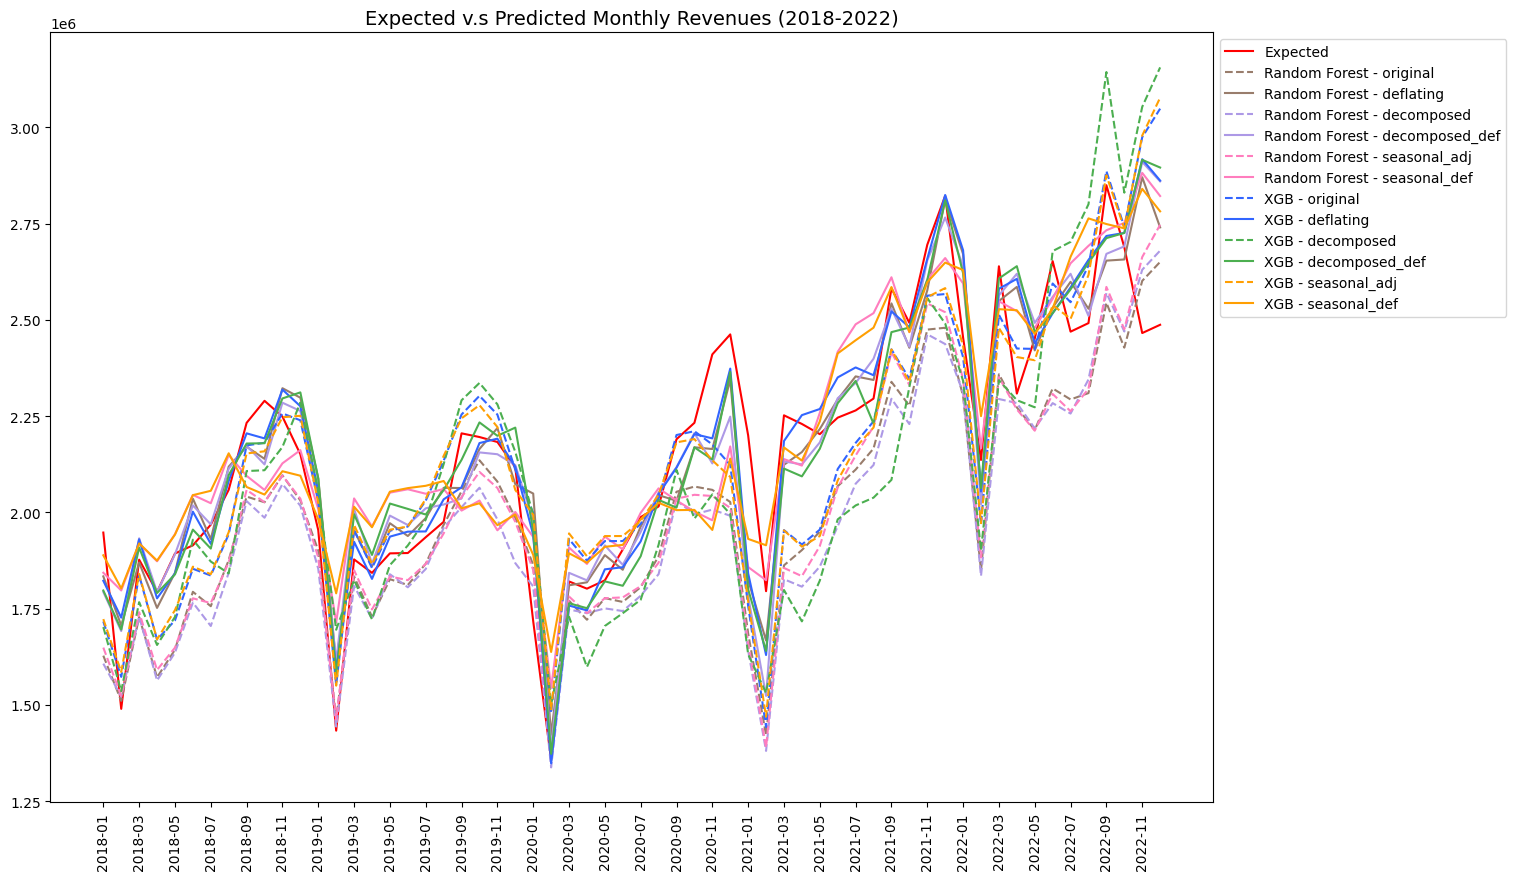

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)

#### **8.1.2 分模型畫圖**

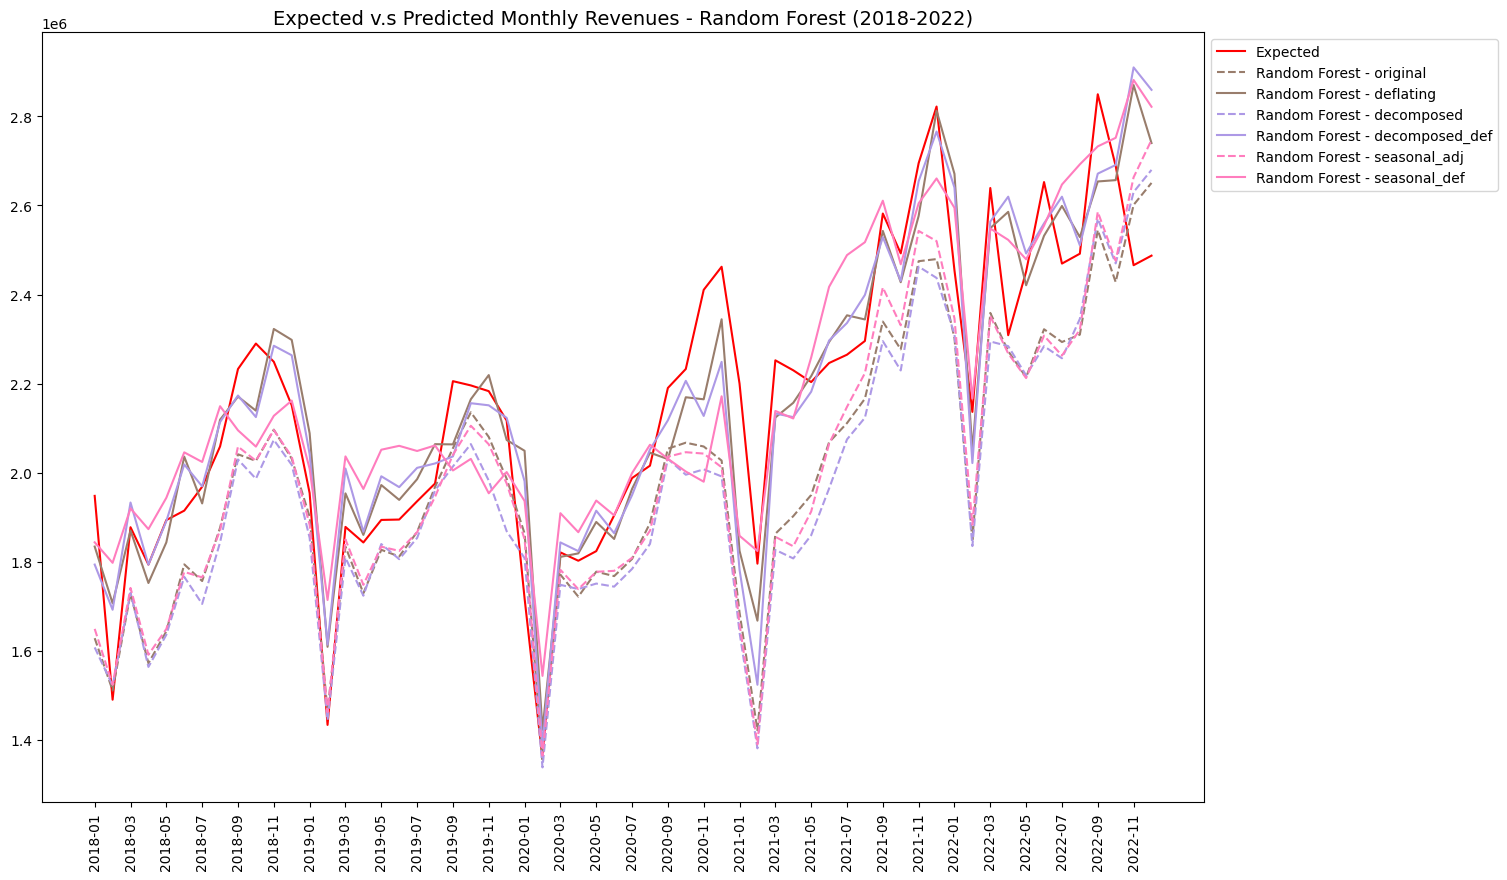

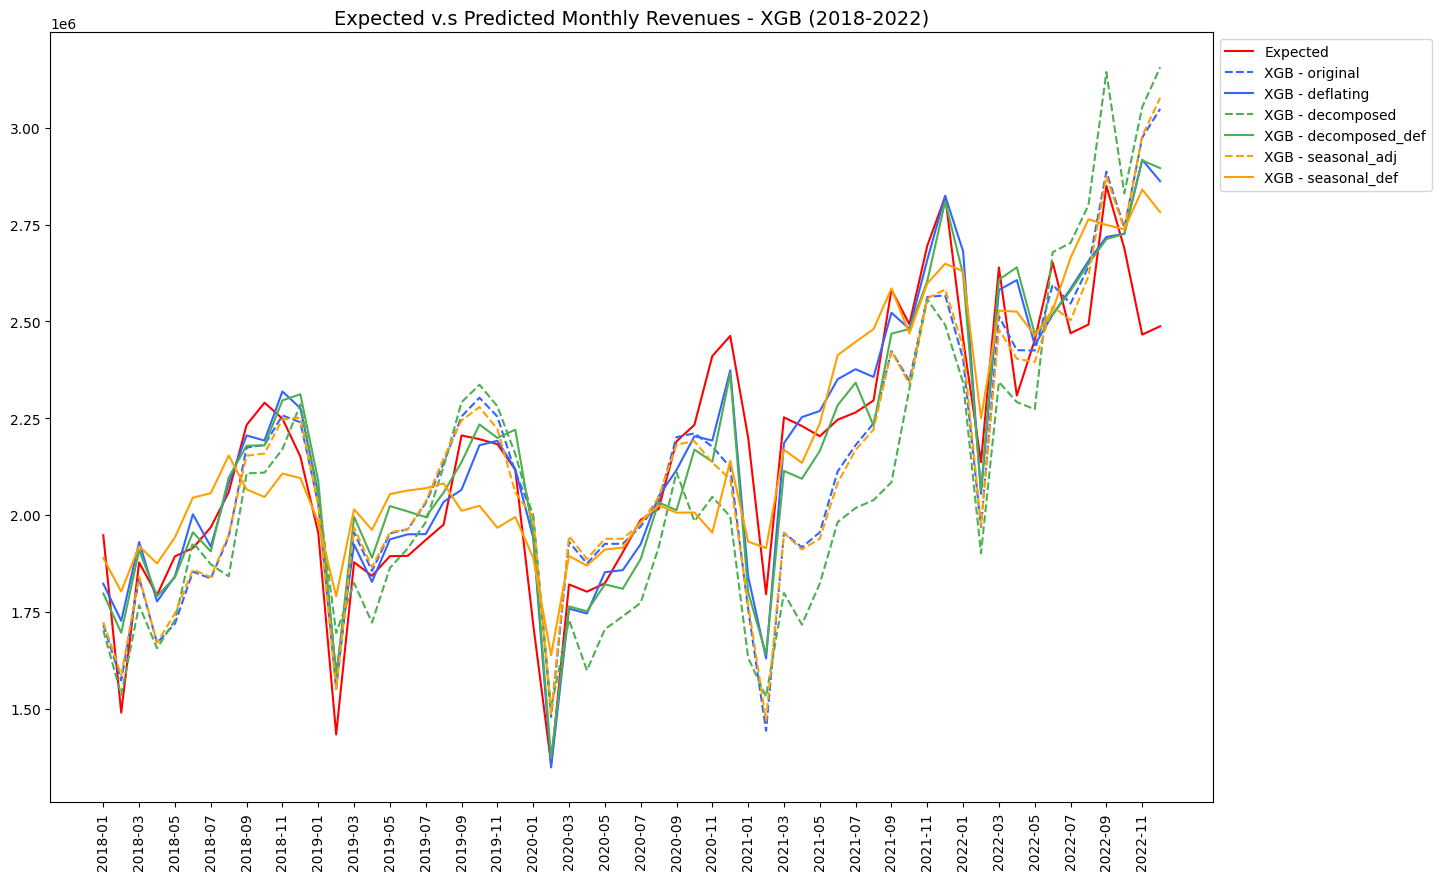

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

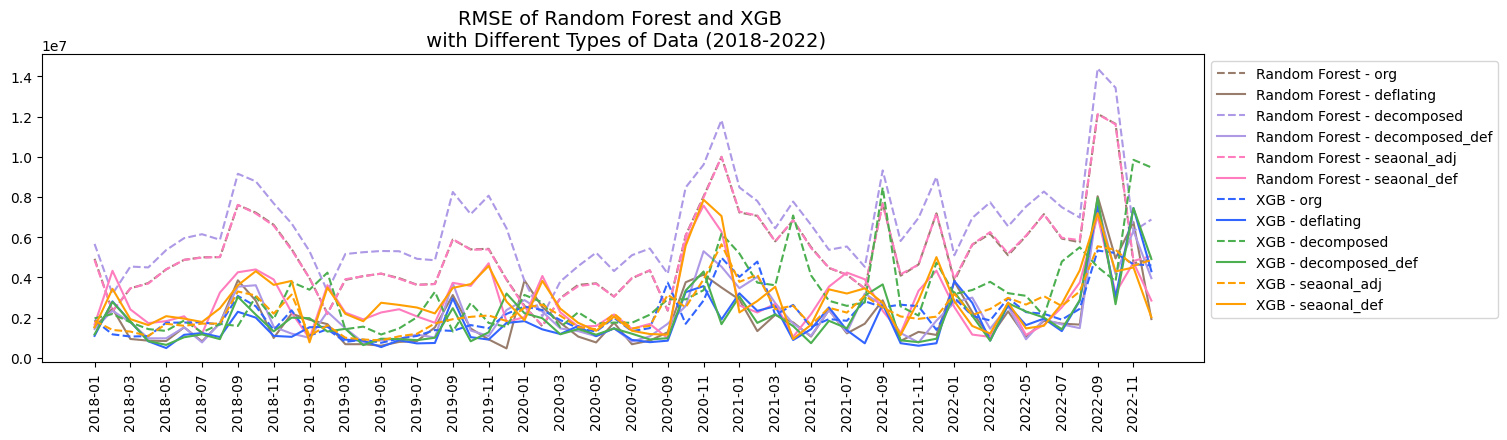

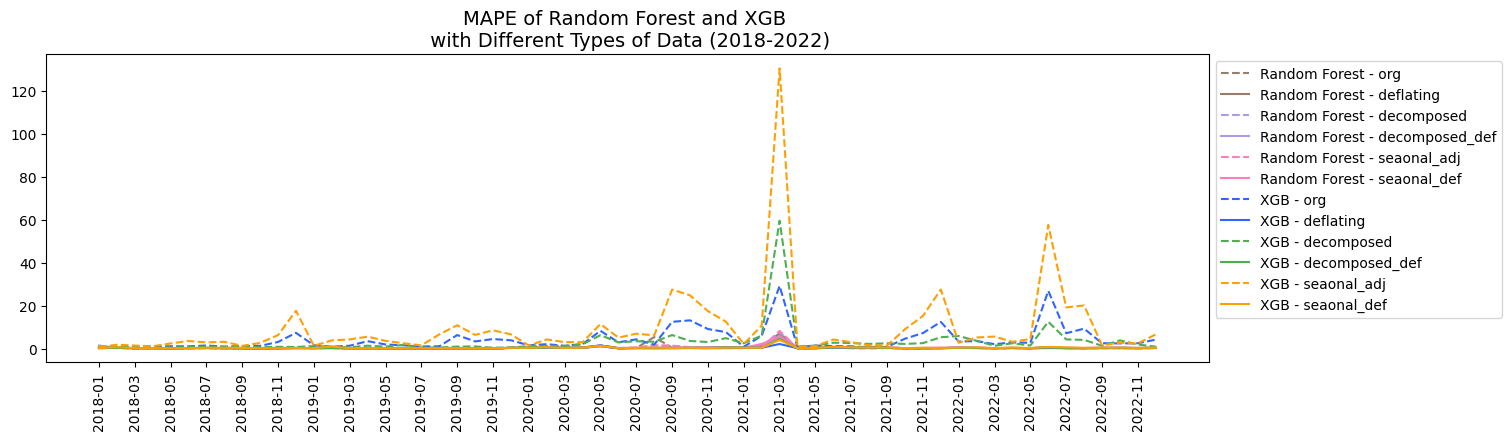

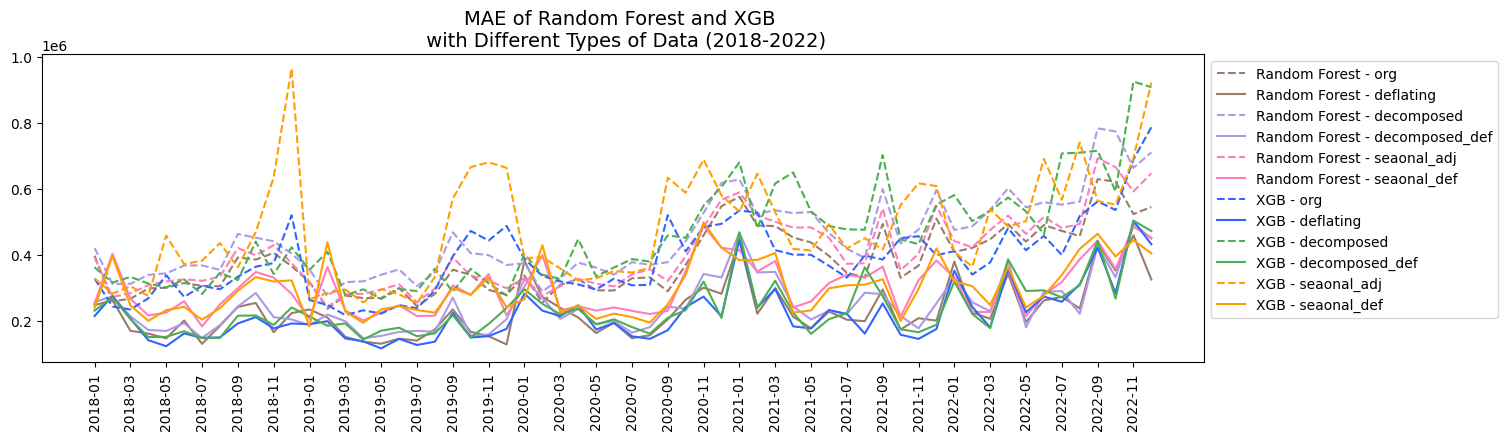

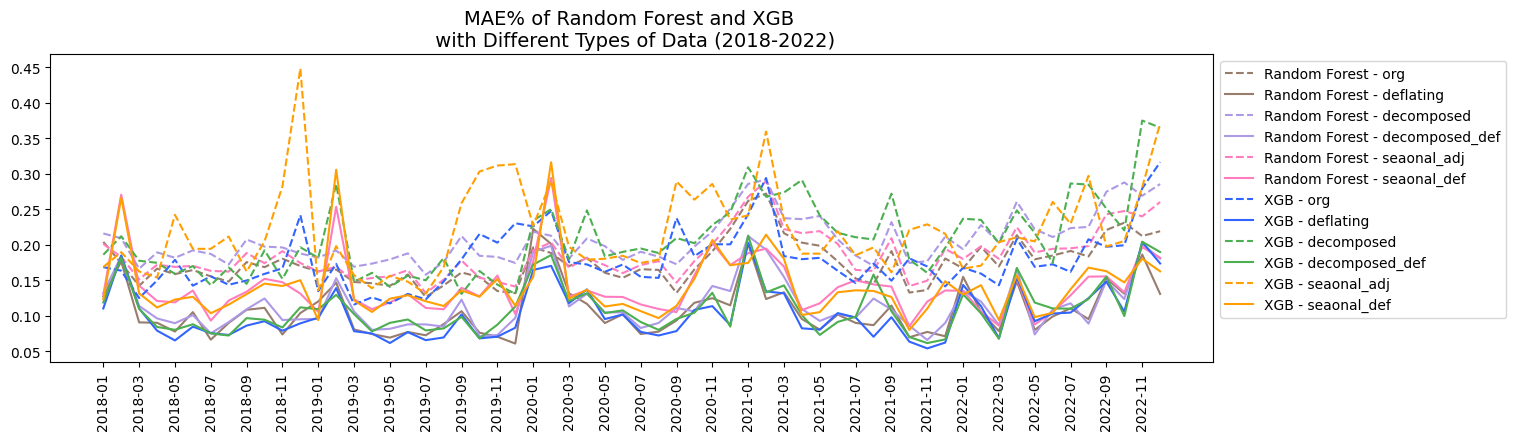

In [ ]:
plotAllScores(scores_rf, scores_xgb, start_y)

#### **8.2.2 分模型畫圖**

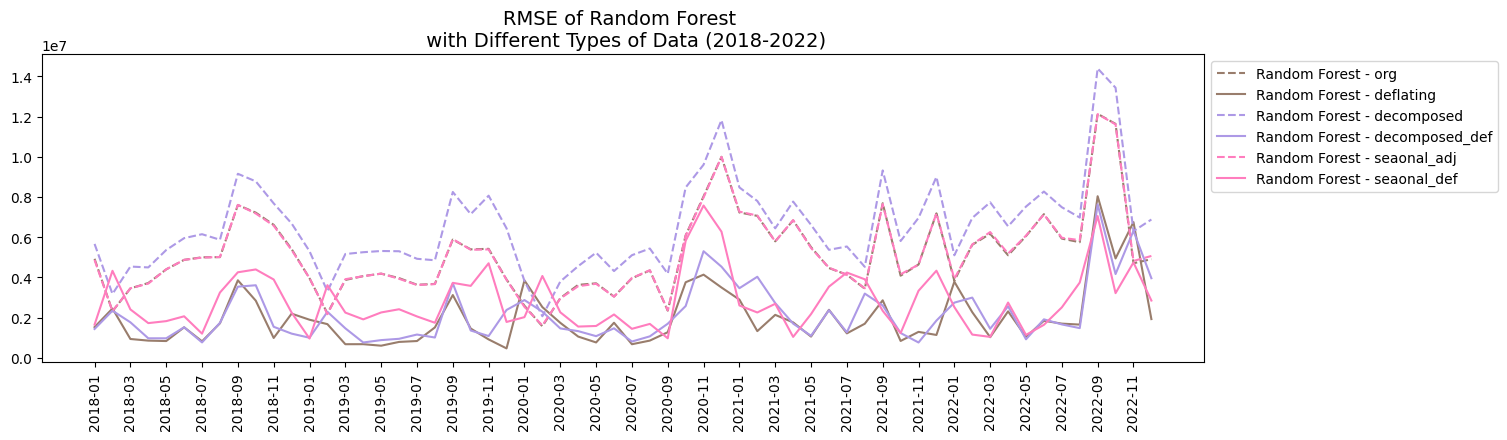

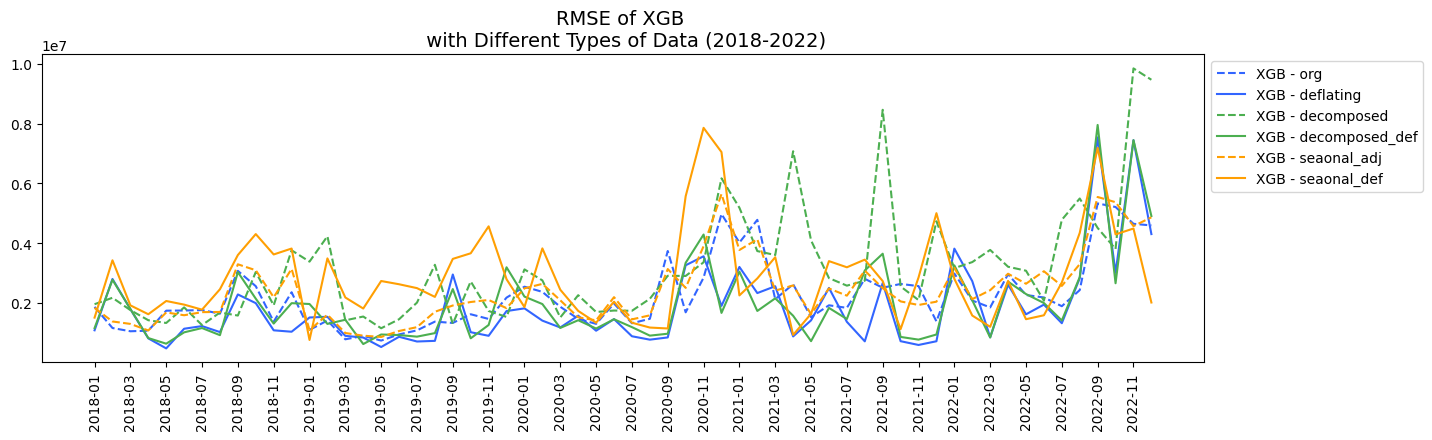

In [ ]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

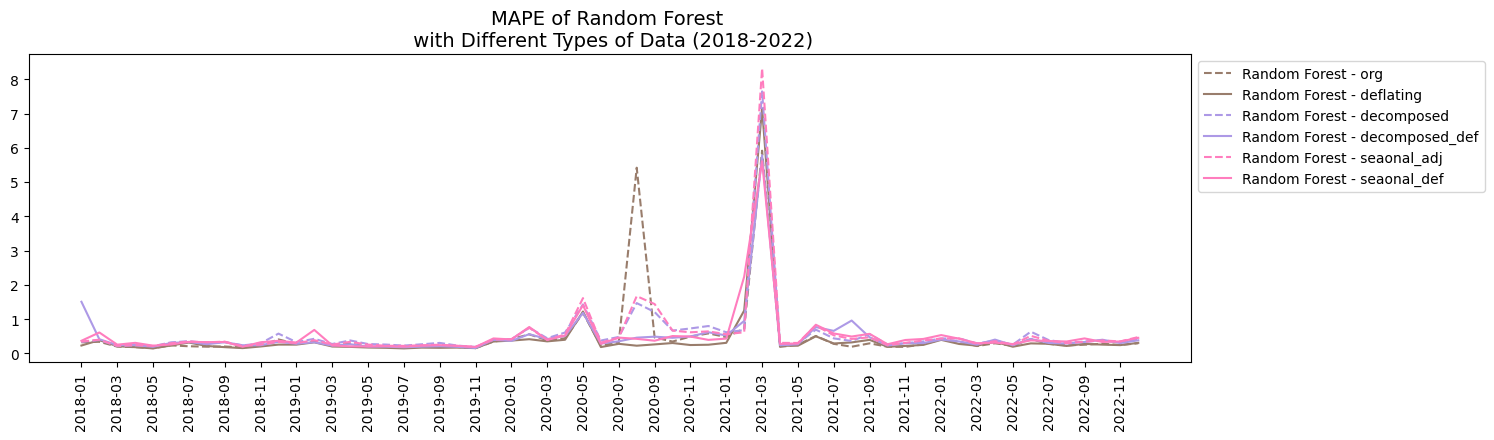

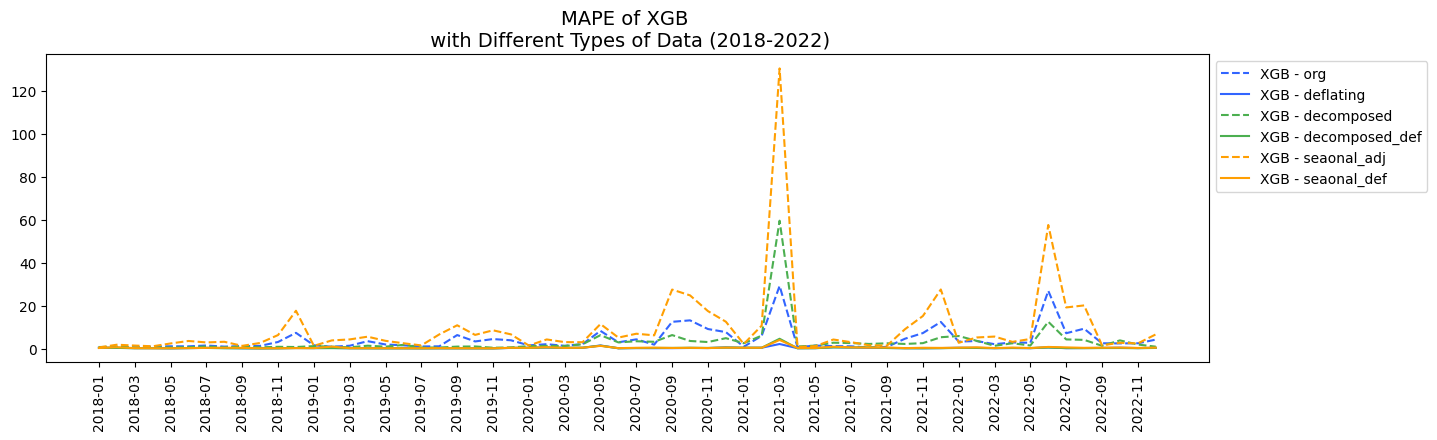

In [ ]:
# MAPE
compareModelScore(scores_rf, scores_xgb, 'MAPE', start_y)  

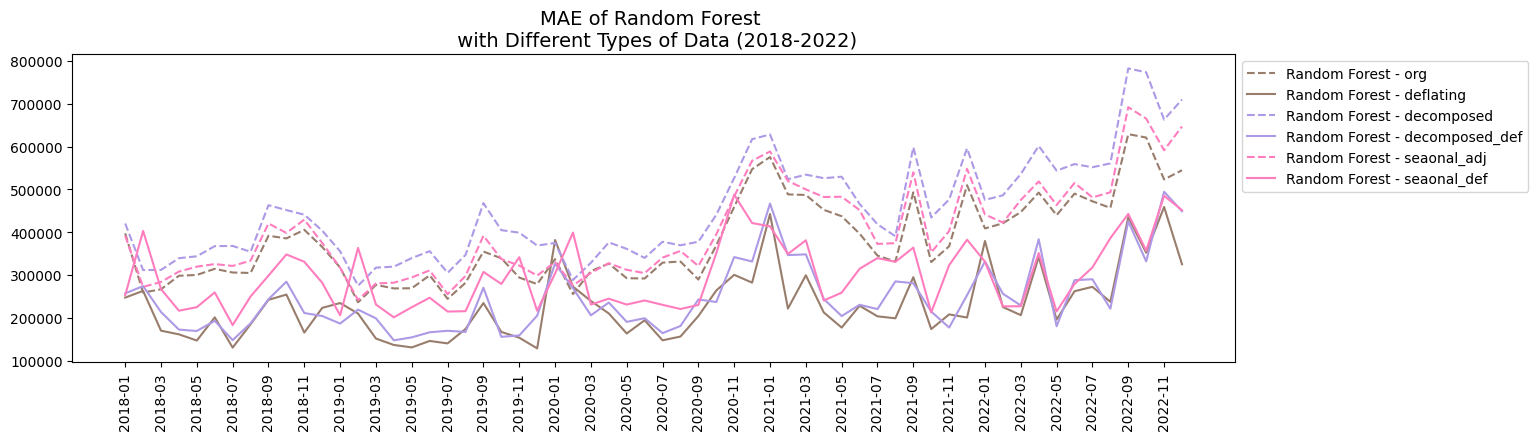

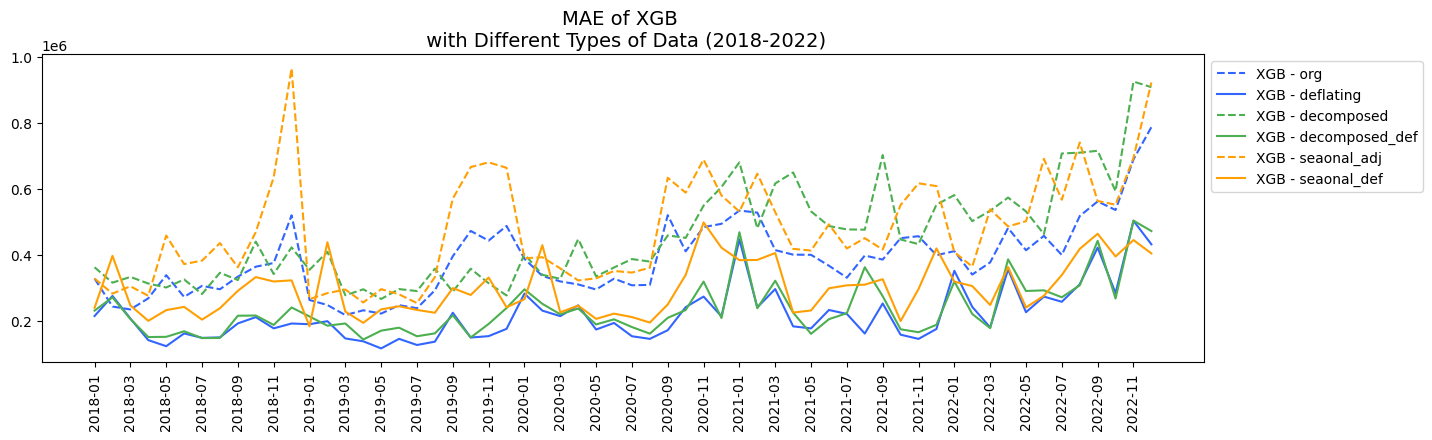

In [ ]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

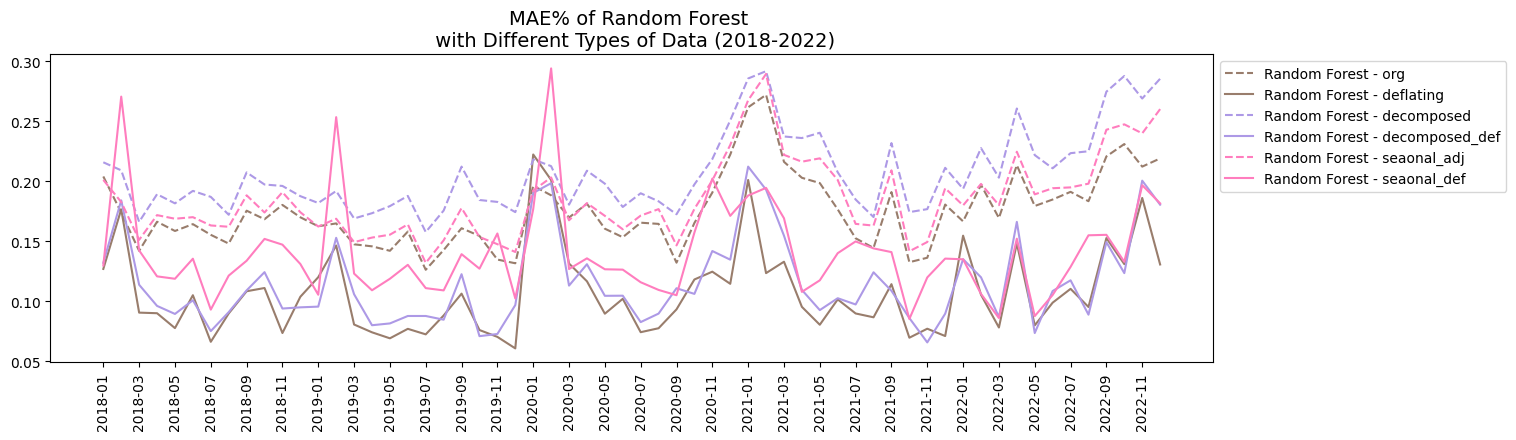

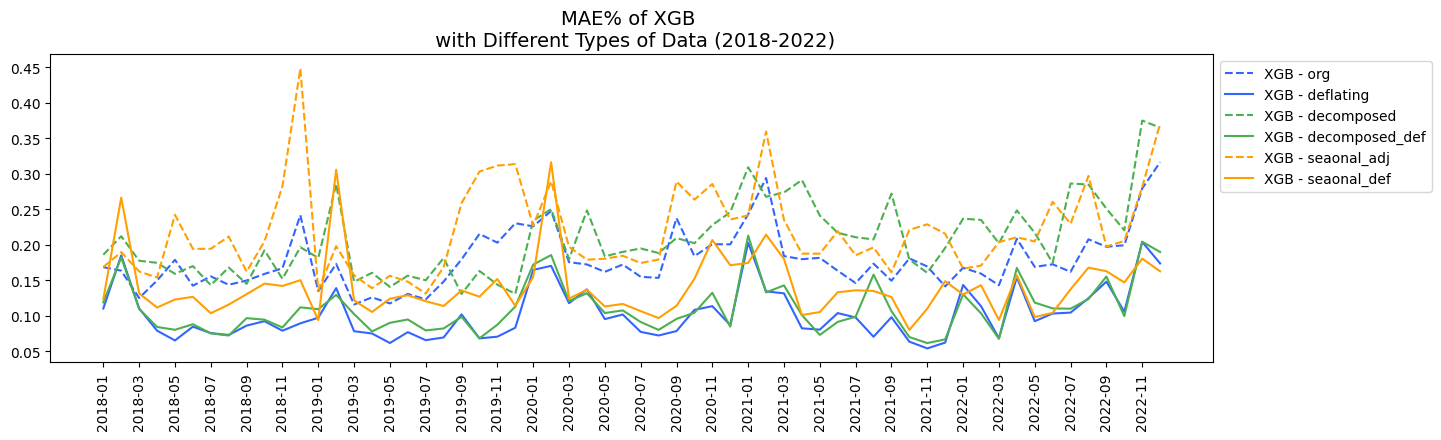

In [ ]:
# MAE%
compareModelScore(scores_rf, scores_xgb, 'MAE%', start_y)  

#### **8.2.3 Boxplot**

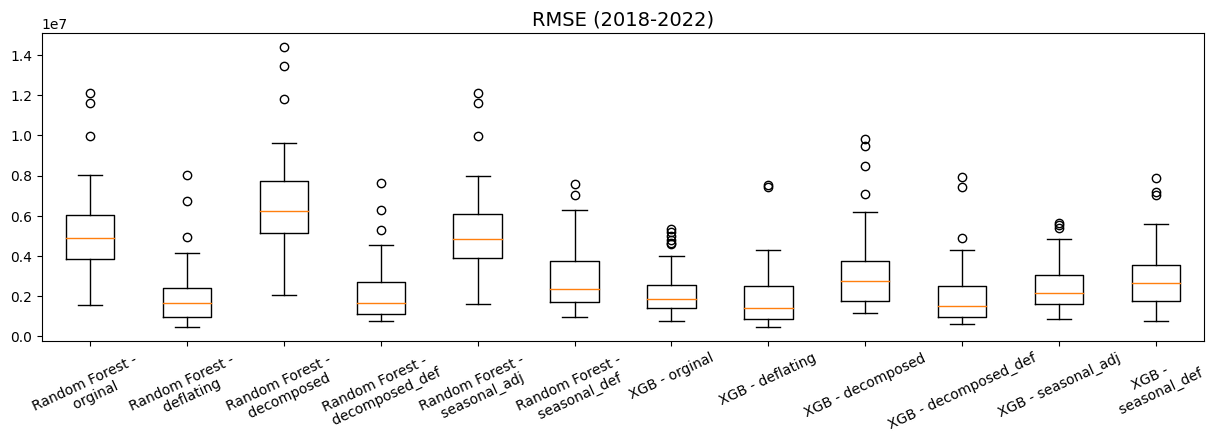

In [ ]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)  

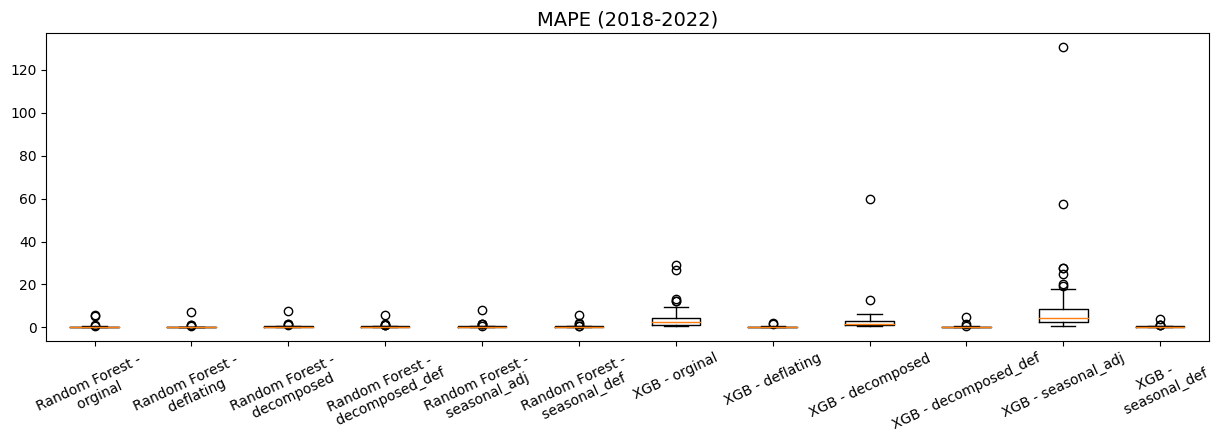

In [ ]:
# MAPE
scoreBoxplotV(scores_rf, scores_xgb, 'MAPE', start_y)  

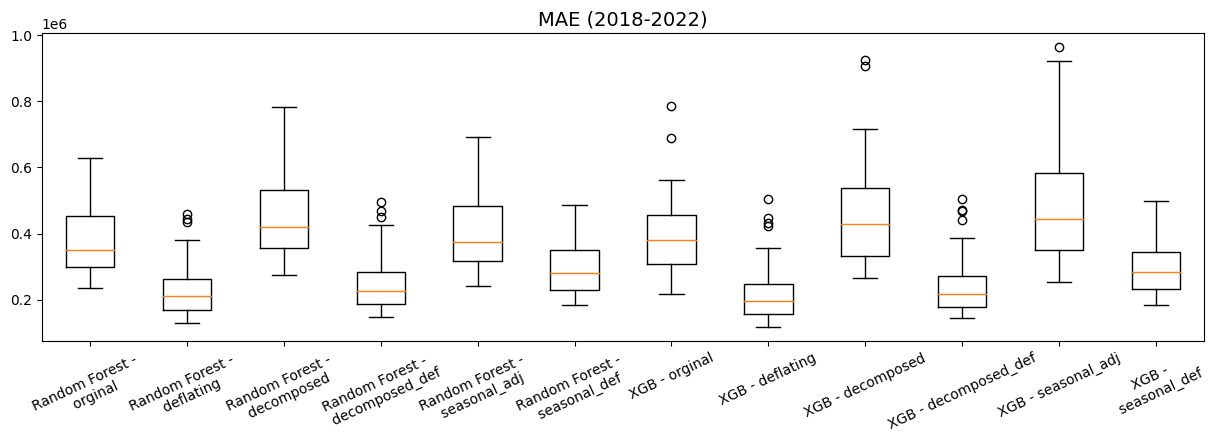

In [ ]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

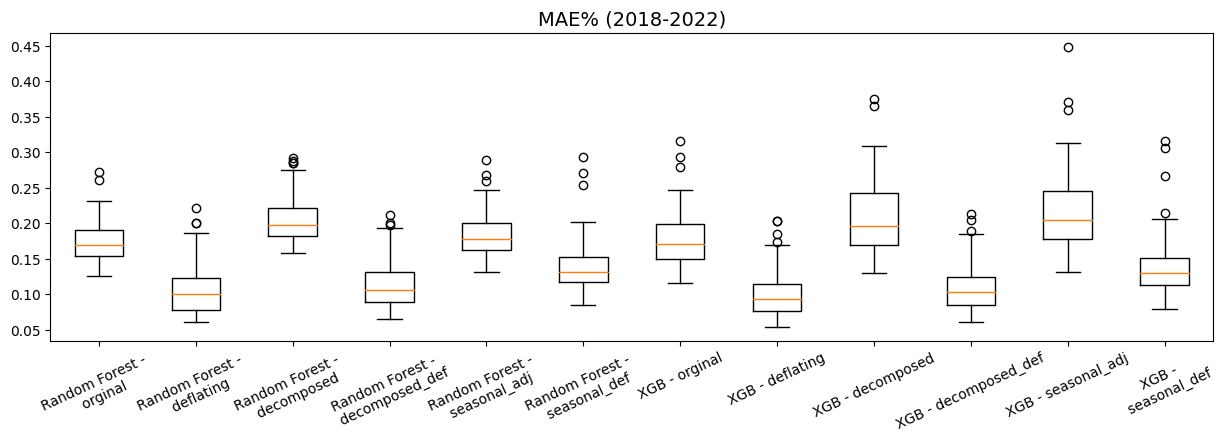

In [ ]:
# MAE%
scoreBoxplotV(scores_rf, scores_xgb, 'MAE%', start_y)  

### **8.3 Feature Importance**

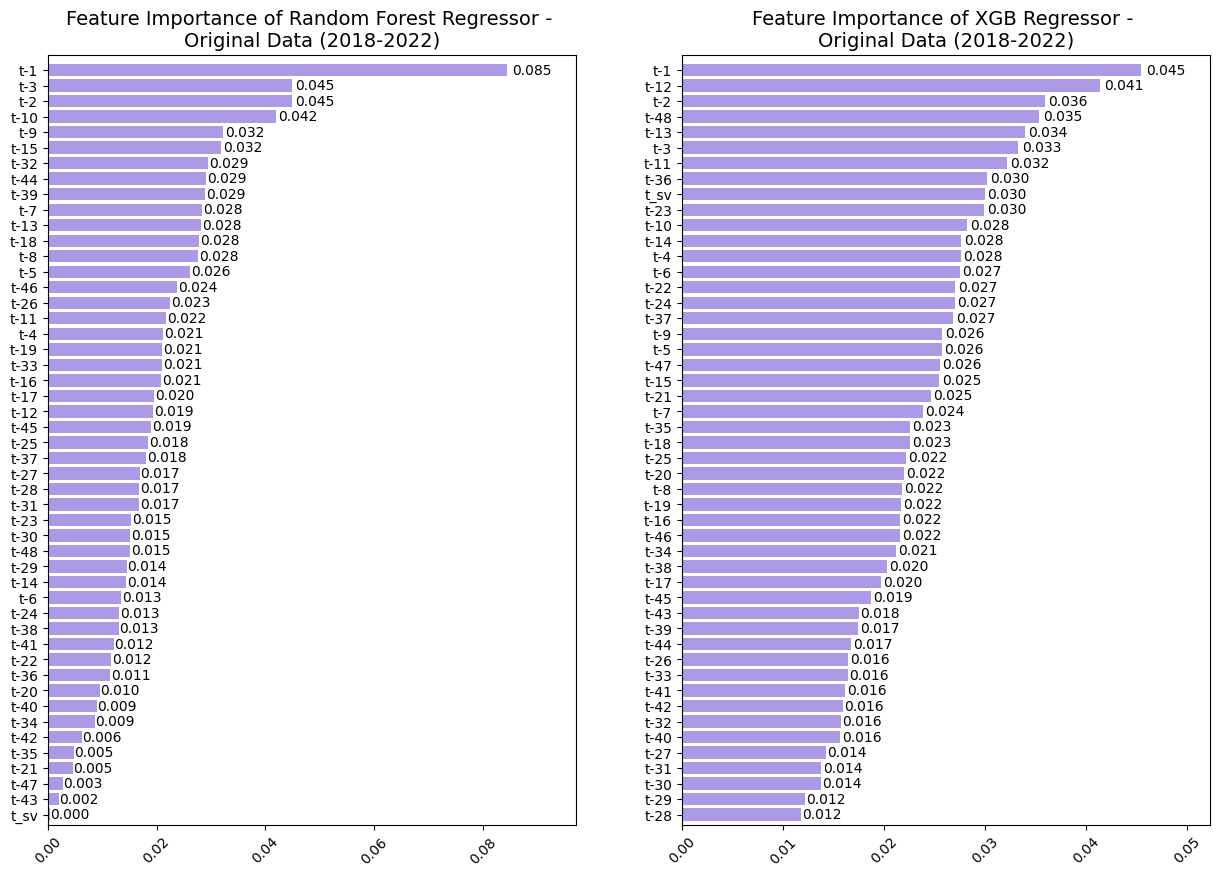

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['org'], feature_importance_xgb['org']['org'], 'org', start_y, 49)

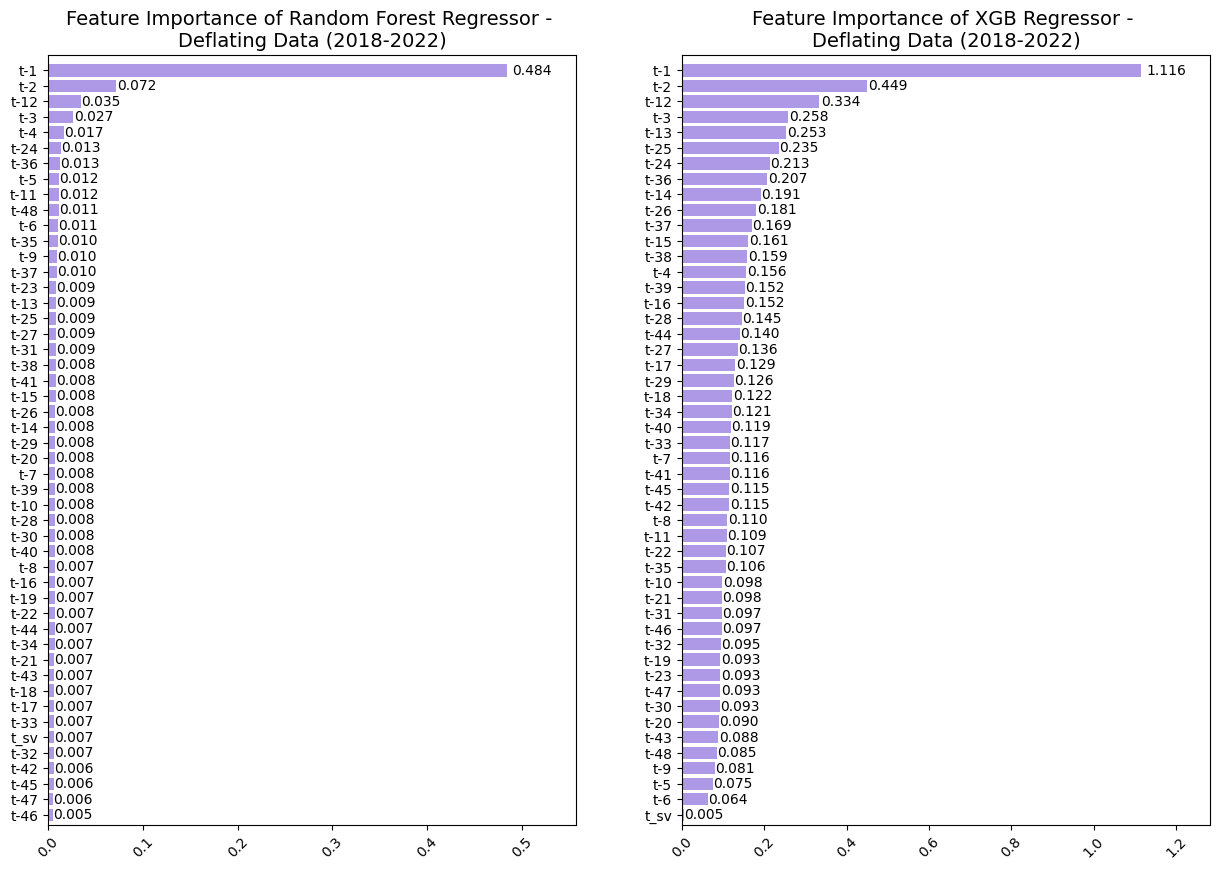

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['org'], feature_importance_xgb['def']['org'], 'def', start_y, 49)

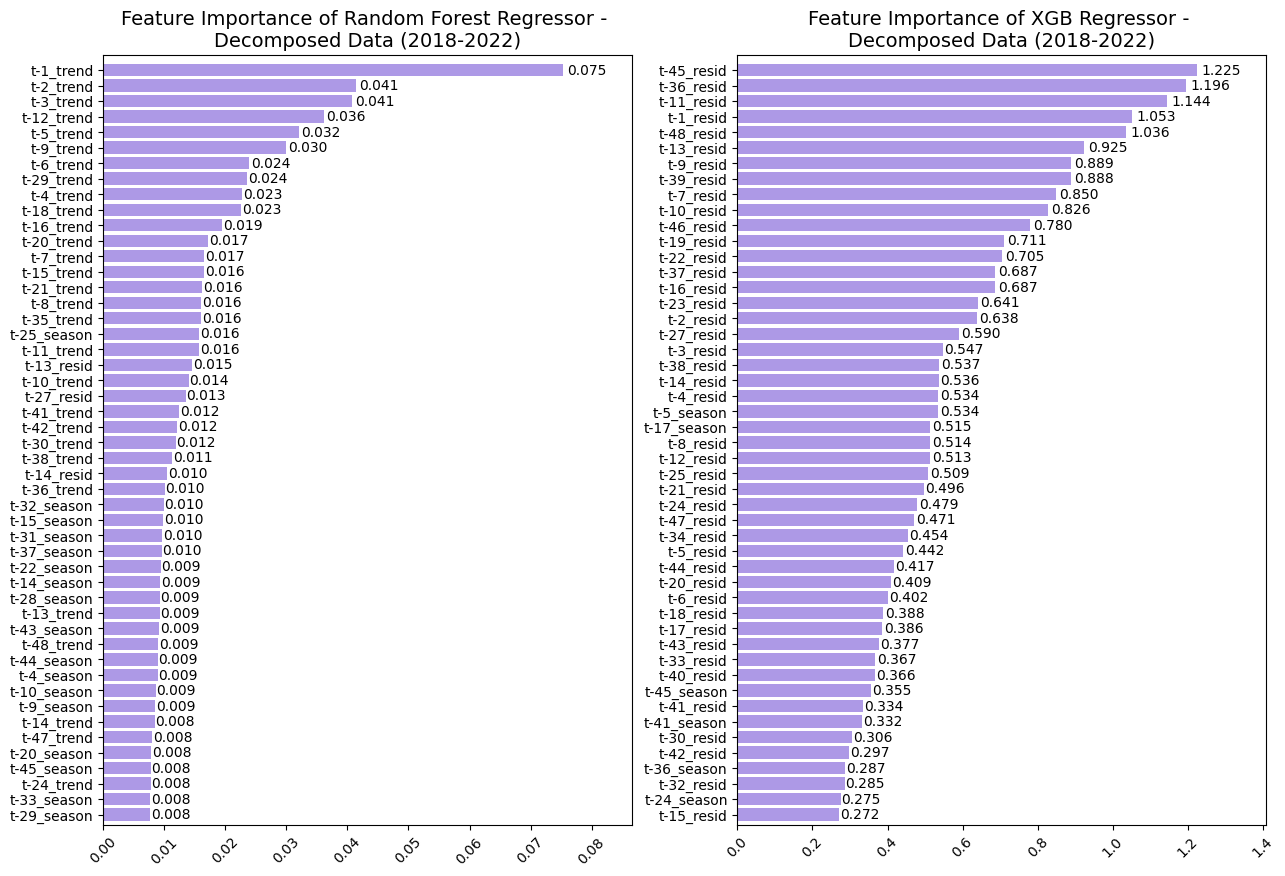

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['dec'], feature_importance_xgb['org']['dec'], 'dec', start_y, 49)

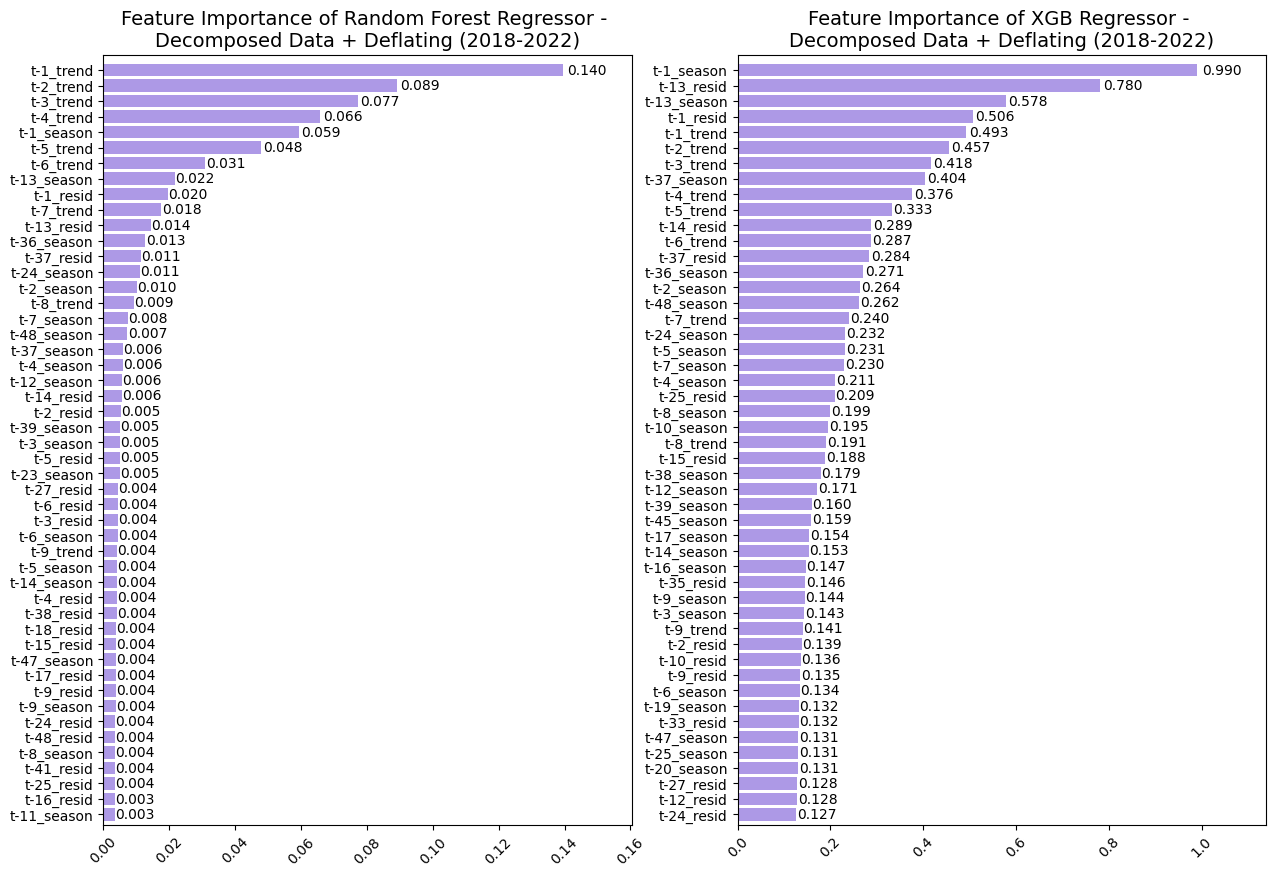

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['dec'], feature_importance_xgb['def']['dec'], 'dec_def', start_y, 49)

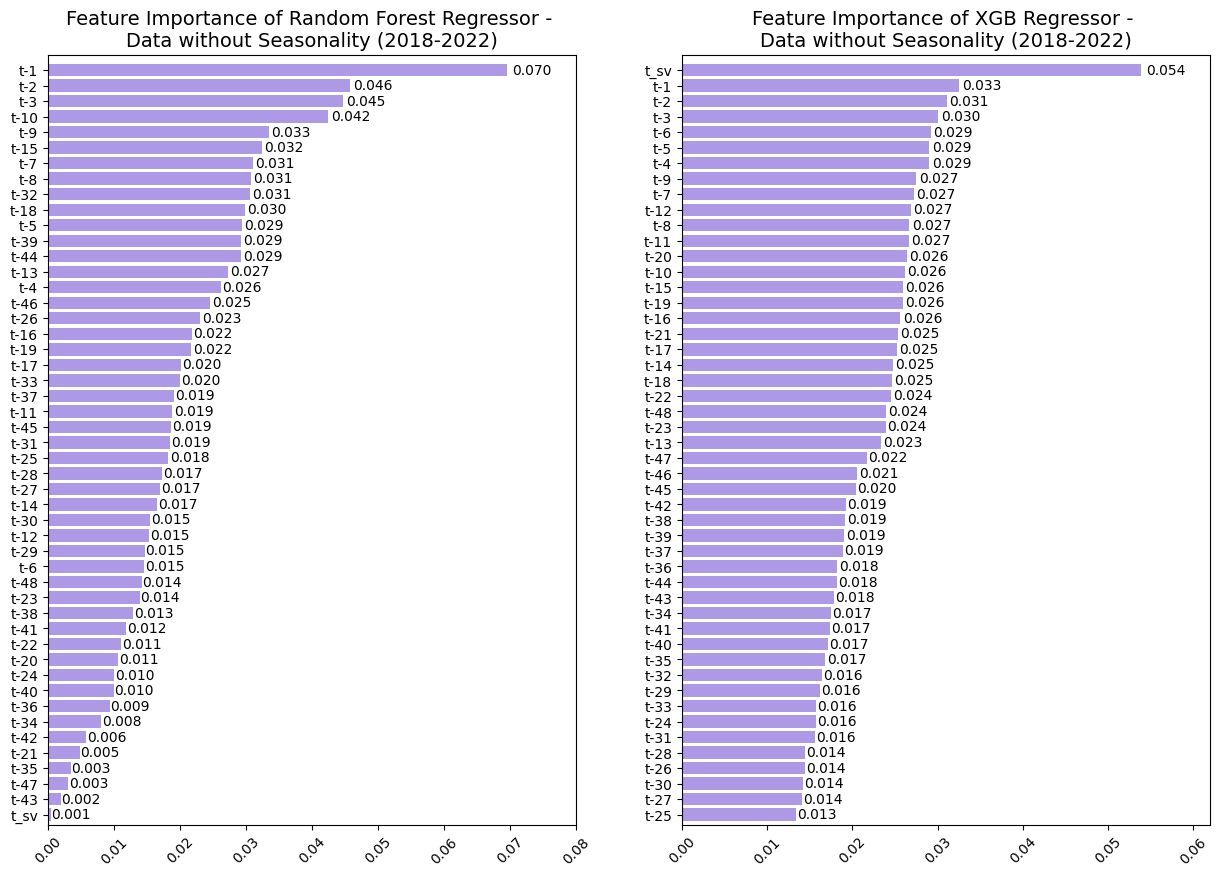

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['season'], feature_importance_xgb['org']['season'], 'season', start_y, 49)

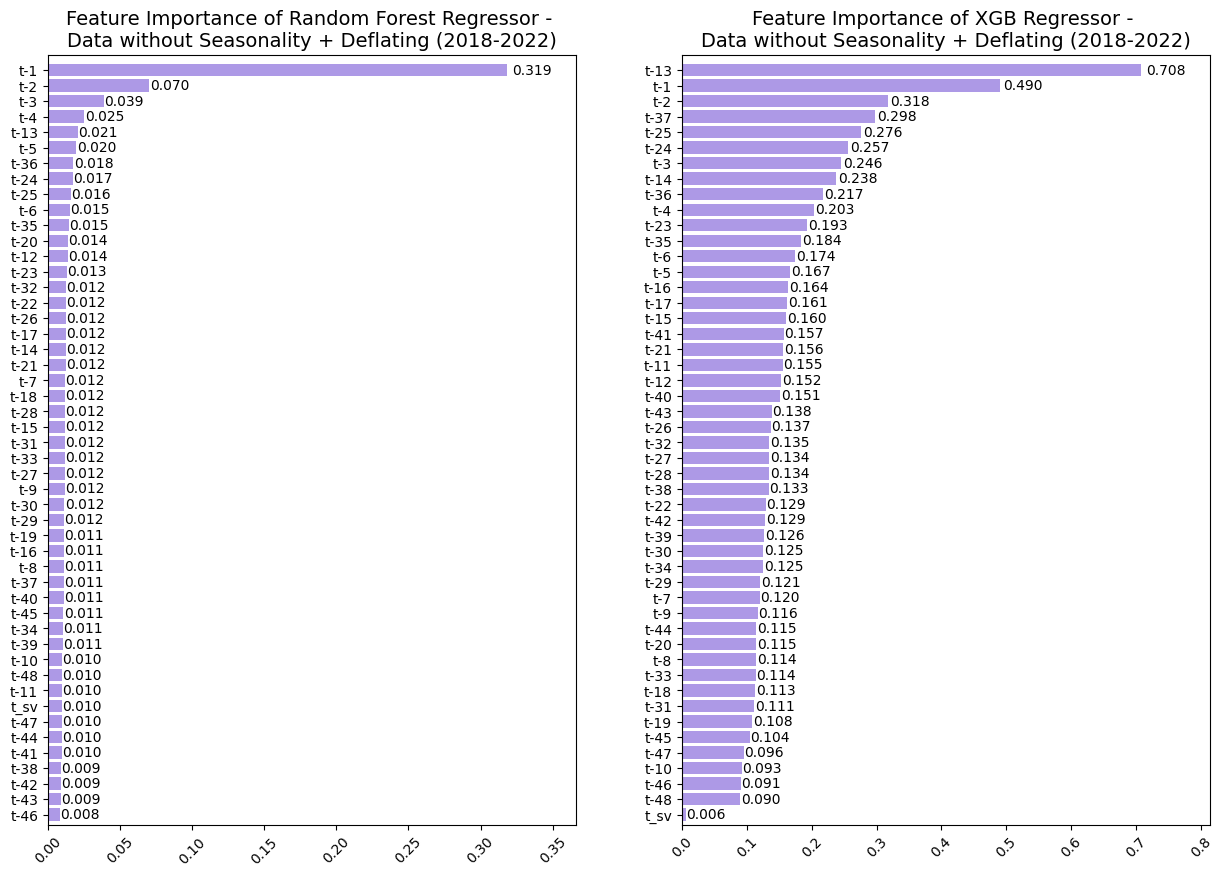

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['season'], feature_importance_xgb['def']['season'], 'season_def', start_y, 49)

## **9. Best and Worst Model**

2023.04.05

In [ ]:
bw = BestWorstModel(scores_rf, scores_xgb)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0   Random Forest         org      RMSE   2020-02  1563772.0
4   Random Forest         def      RMSE   2019-12   464410.0
8   Random Forest         dec      RMSE   2020-02  2065337.0
12  Random Forest     dec_def      RMSE   2021-11   758523.0
16  Random Forest      season      RMSE   2020-02  1607069.0
20  Random Forest  season_def      RMSE   2019-01   955419.0
0             XGB         org      RMSE   2019-05   744115.0
4             XGB         def      RMSE   2018-05   482064.0
8             XGB         dec      RMSE   2019-05  1155783.0
12            XGB     dec_def      RMSE   2019-04   627849.0
16            XGB      season      RMSE   2019-05   865304.0
20            XGB  season_def      RMSE   2019-01   763884.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month   max_score
0   Random Forest         org      RMSE   2022-09  12133008.0
4   Random Forest         def      RMSE   2022-09   8035505.0
8   Random Forest         dec      RMSE   2022-09  14394139.0
12  Random Forest     dec_def      RMSE   2022-09   7631725.0
16  Random Forest      season      RMSE   2022-09  12119382.0
20  Random Forest  season_def      RMSE   2020-11   7571602.0
0             XGB         org      RMSE   2022-09   5331105.0
4             XGB         def      RMSE   2022-09   7540313.0
8             XGB         dec      RMSE   2022-11   9846601.0
12            XGB     dec_def      RMSE   2022-09   7955386.0
16            XGB      season      RMSE   2020-12   5643507.0
20            XGB  season_def      RMSE   2020-11   7858690.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3   Random Forest         org      MAPE   2018-05     0.1515
7   Random Forest         def      MAPE   2019-07     0.1445
11  Random Forest         dec      MAPE   2019-11     0.1871
15  Random Forest     dec_def      MAPE   2019-11     0.1563
19  Random Forest      season      MAPE   2019-11     0.1907
23  Random Forest  season_def      MAPE   2019-11     0.1857
3             XGB         org      MAPE   2021-08     0.5579
7             XGB         def      MAPE   2019-11     0.1576
11            XGB         dec      MAPE   2019-11     0.4599
15            XGB     dec_def      MAPE   2018-10     0.1492
19            XGB      season      MAPE   2018-01     0.6047
23            XGB  season_def      MAPE   2019-11     0.1916

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3   Random Forest         org      MAPE   2021-03     5.9149
7   Random Forest         def      MAPE   2021-03     7.1463
11  Random Forest         dec      MAPE   2021-03     7.6451
15  Random Forest     dec_def      MAPE   2021-03     5.7805
19  Random Forest      season      MAPE   2021-03     8.3166
23  Random Forest  season_def      MAPE   2021-03     5.6066
3             XGB         org      MAPE   2021-03    29.2537
7             XGB         def      MAPE   2021-03     2.1919
11            XGB         dec      MAPE   2021-03    59.6106
15            XGB     dec_def      MAPE   2021-03     4.6402
19            XGB      season      MAPE   2021-03   130.5241
23            XGB  season_def      MAPE   2021-03     4.0682

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1   Random Forest         org       MAE   2019-02   236454.0
5   Random Forest         def       MAE   2019-12   128731.0
9   Random Forest         dec       MAE   2019-02   275141.0
13  Random Forest     dec_def       MAE   2019-04   147577.0
17  Random Forest      season       MAE   2019-02   241966.0
21  Random Forest  season_def       MAE   2018-07   183264.0
1             XGB         org       MAE   2019-03   217542.0
5             XGB         def       MAE   2019-05   116727.0
9             XGB         dec       MAE   2019-05   266357.0
13            XGB     dec_def       MAE   2019-04   143522.0
17            XGB      season       MAE   2019-07   253876.0
21            XGB  season_def       MAE   2019-01   183515.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1   Random Forest         org       MAE   2022-09   629000.0
5   Random Forest         def       MAE   2022-11   458990.0
9   Random Forest         dec       MAE   2022-09   782556.0
13  Random Forest     dec_def       MAE   2022-11   494501.0
17  Random Forest      season       MAE   2022-09   692083.0
21  Random Forest  season_def       MAE   2020-11   487519.0
1             XGB         org       MAE   2022-12   786428.0
5             XGB         def       MAE   2022-11   502978.0
9             XGB         dec       MAE   2022-11   924302.0
13            XGB     dec_def       MAE   2022-11   503483.0
17            XGB      season       MAE   2018-12   964110.0
21            XGB  season_def       MAE   2020-11   498100.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2   Random Forest         org      MAE%   2019-07     0.1263
6   Random Forest         def      MAE%   2019-12     0.0608
10  Random Forest         dec      MAE%   2019-07     0.1577
14  Random Forest     dec_def      MAE%   2021-11     0.0658
18  Random Forest      season      MAE%   2019-07     0.1320
22  Random Forest  season_def      MAE%   2021-10     0.0853
2             XGB         org      MAE%   2019-03     0.1158
6             XGB         def      MAE%   2021-11     0.0540
10            XGB         dec      MAE%   2019-09     0.1307
14            XGB     dec_def      MAE%   2021-11     0.0615
18            XGB      season      MAE%   2019-07     0.1312
22            XGB  season_def      MAE%   2021-10     0.0800

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2   Random Forest         org      MAE%   2021-02     0.2720
6   Random Forest         def      MAE%   2020-01     0.2223
10  Random Forest         dec      MAE%   2021-02     0.2917
14  Random Forest     dec_def      MAE%   2021-01     0.2122
18  Random Forest      season      MAE%   2021-02     0.2894
22  Random Forest  season_def      MAE%   2020-02     0.2940
2             XGB         org      MAE%   2022-12     0.3162
6             XGB         def      MAE%   2022-11     0.2040
10            XGB         dec      MAE%   2022-11     0.3748
14            XGB     dec_def      MAE%   2021-01     0.2128
18            XGB      season      MAE%   2018-12     0.4482
22            XGB  season_def      MAE%   2020-02     0.3161

### **9.2 Random Forest 和 XGB 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

In [ ]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2019-12   464410.0

In [ ]:
# XGB
bw.best_xgb['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2018-05   482064.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14394139.0

In [ ]:
# XGB
bw.worst_xgb['RMSE']

modelName dataType scoreType max_month  max_score
8       XGB      dec      RMSE   2022-11  9846601.0

##### **Feature Importance**



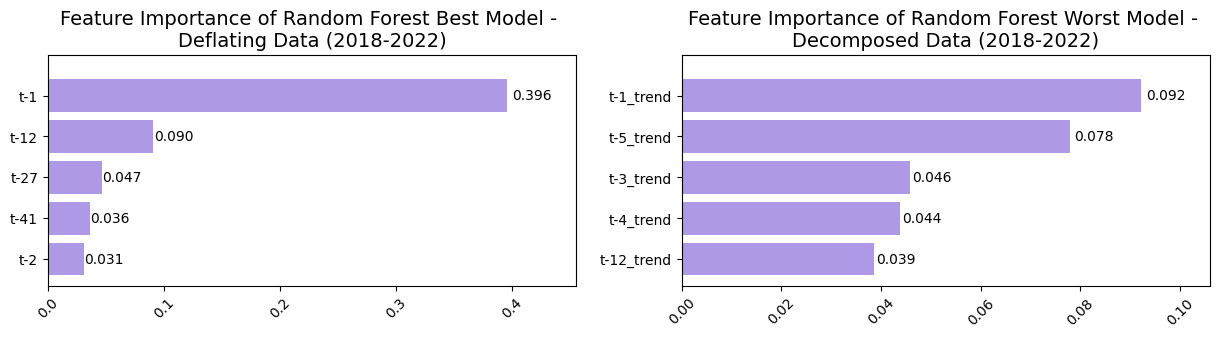

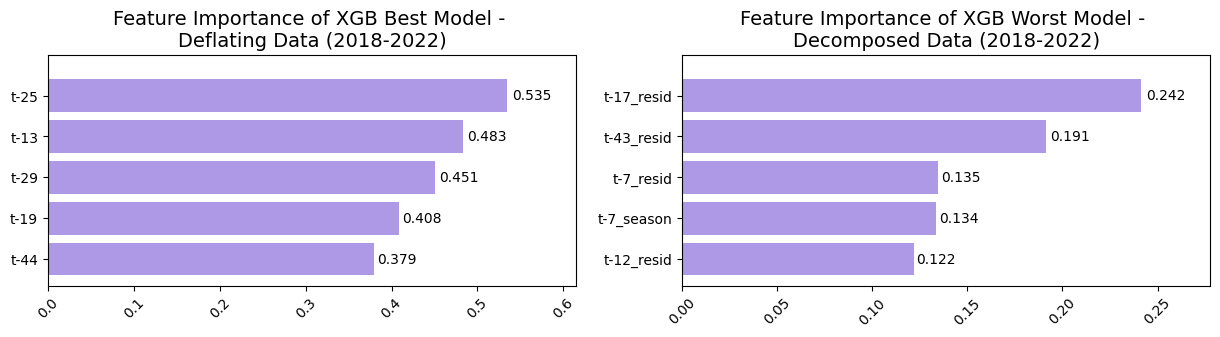

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2019-07     0.1445

In [ ]:
# XGB
bw.best_xgb['MAPE']

modelName dataType scoreType min_month  min_score
15       XGB  dec_def      MAPE   2018-10     0.1492

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAPE']

modelName dataType scoreType max_month  max_score
19  Random Forest   season      MAPE   2021-03     8.3166

In [ ]:
# XGB
bw.worst_xgb['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03   130.5241

##### **Feature Importance**



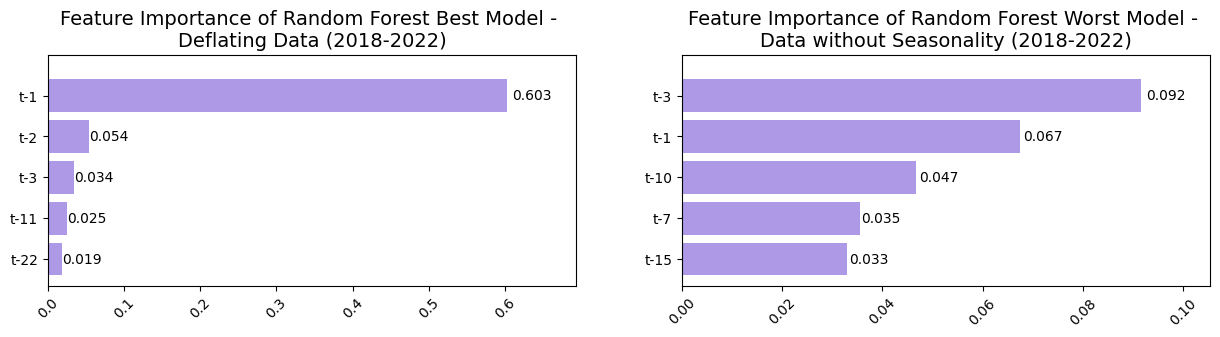

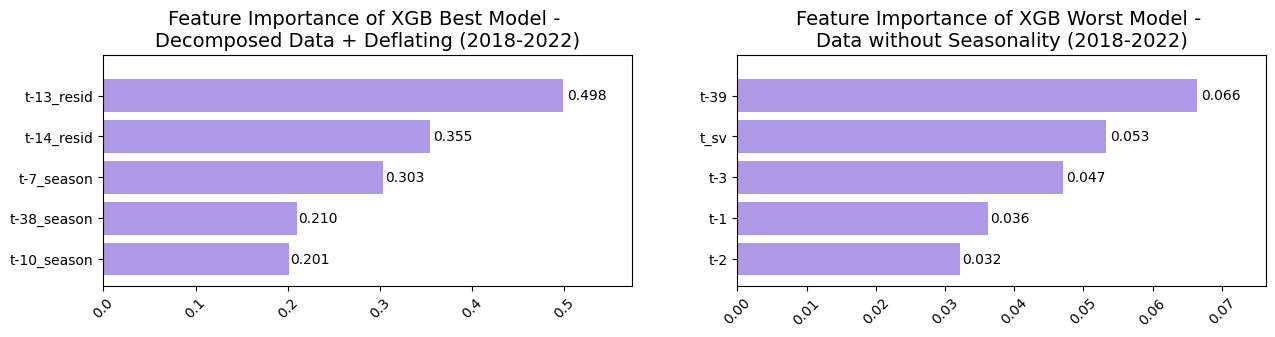

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k)

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2019-12   128731.0

In [ ]:
# XGB
bw.best_xgb['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   116727.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE']

modelName dataType scoreType max_month  max_score
9  Random Forest      dec       MAE   2022-09   782556.0

In [ ]:
# XGB
bw.worst_xgb['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12   964110.0

##### **Feature Importance**



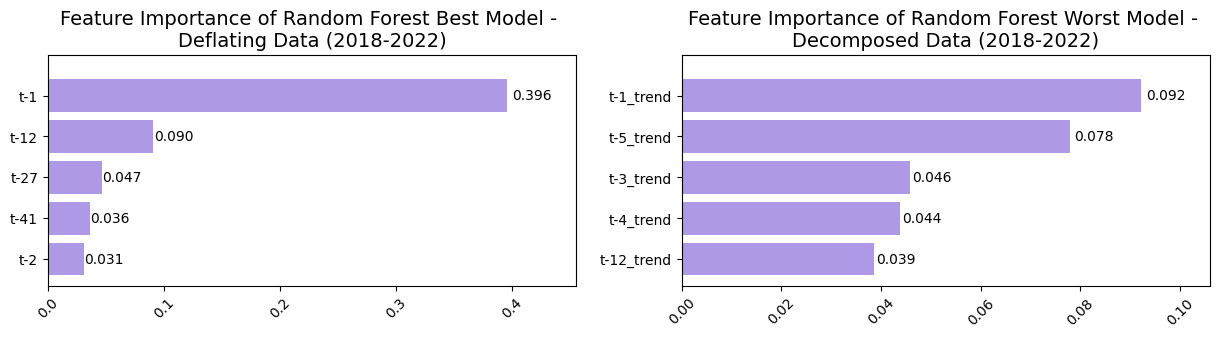

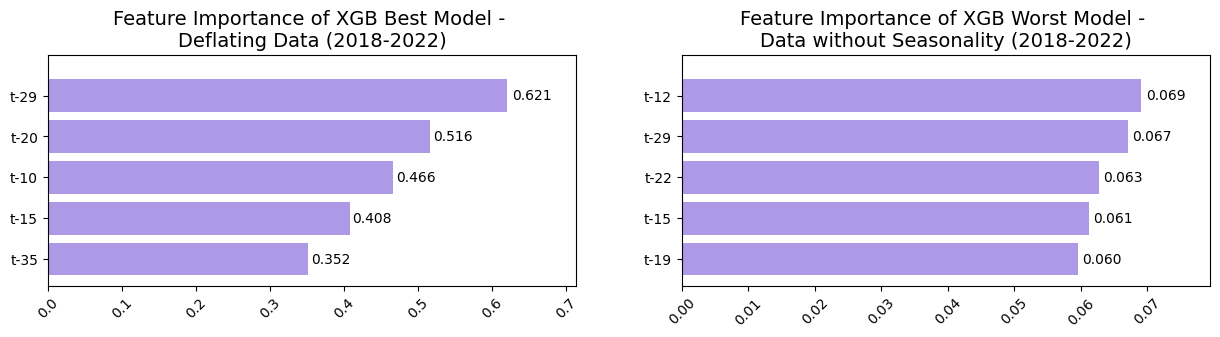

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE%']

modelName dataType scoreType min_month  min_score
6  Random Forest      def      MAE%   2019-12     0.0608

In [ ]:
# XGB
bw.best_xgb['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11      0.054

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2020-02      0.294

In [ ]:
# XGB
bw.worst_xgb['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4482

##### **Feature Importance**



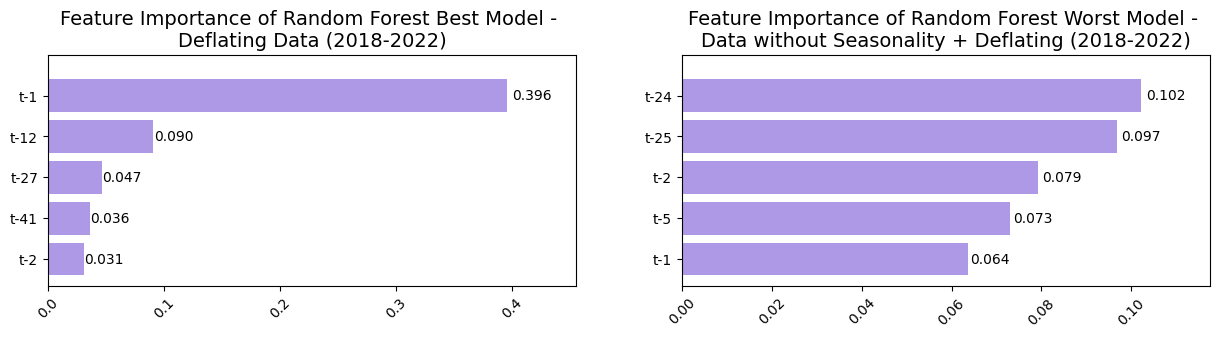

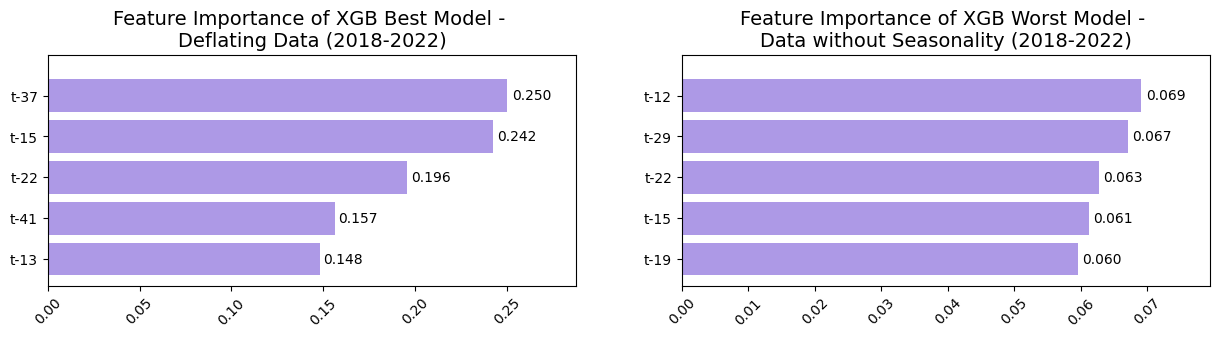

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k)

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2019-12   464410.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14394139.0

##### **Feature Importance**



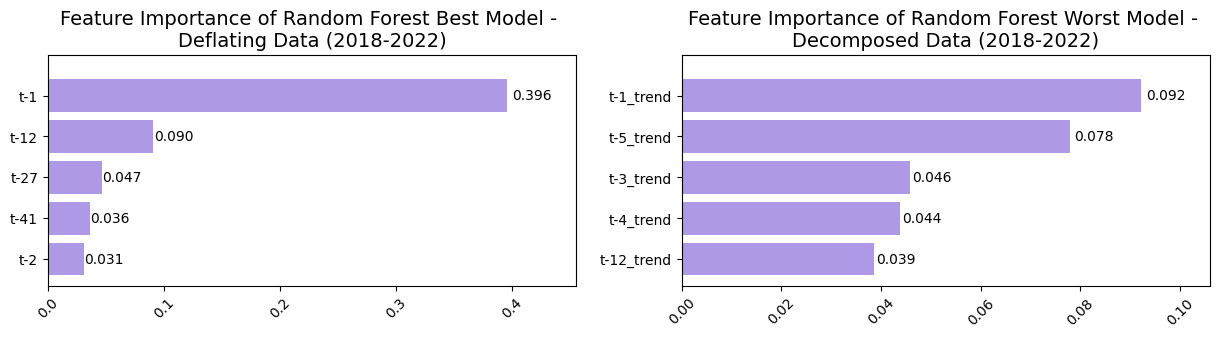

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k, all = True)

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2019-07     0.1445

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03   130.5241

##### **Feature Importance**



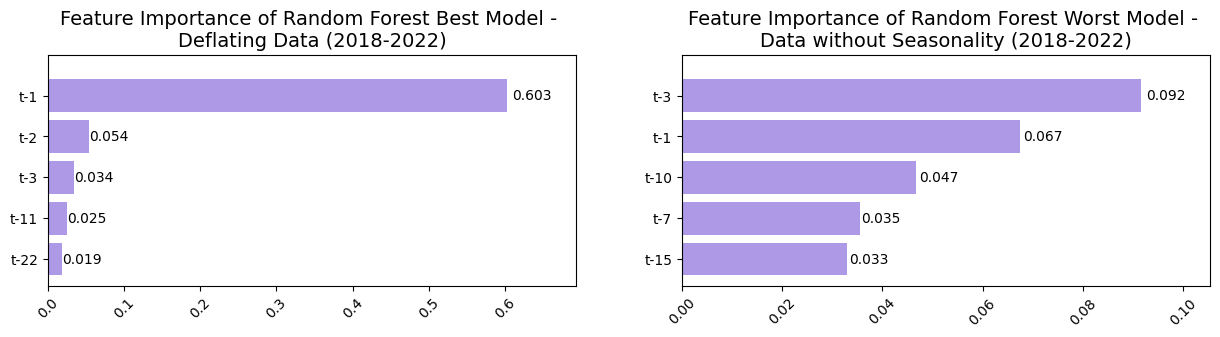

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k, all = True)

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   116727.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12   964110.0

##### **Feature Importance**



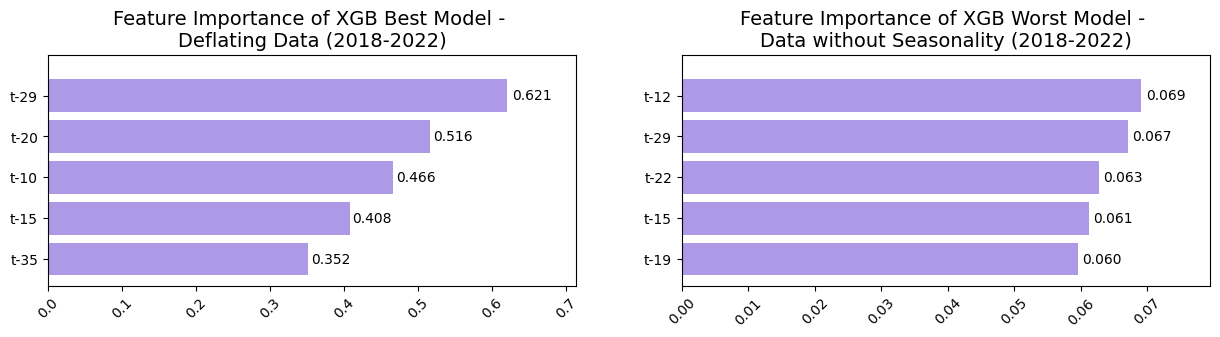

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k, all = True)

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11      0.054

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4482

##### **Feature Importance**



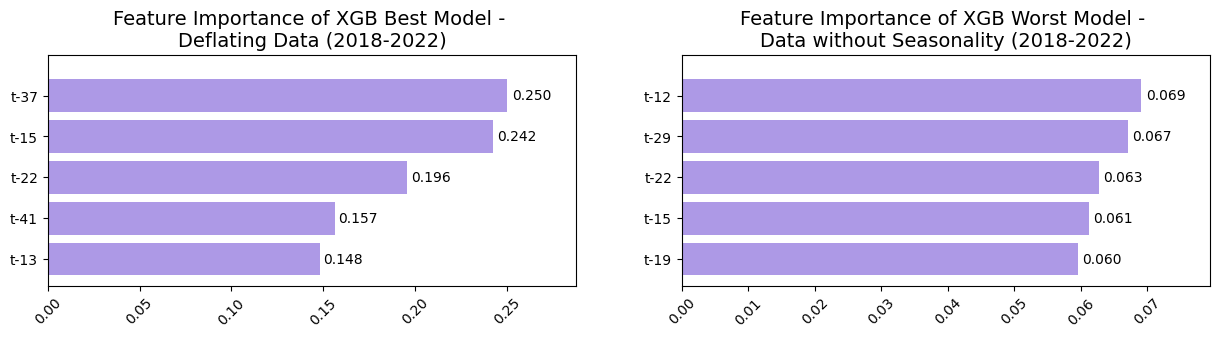

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k, all = True)